In [179]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, precision_recall_curve

from sklearn.decomposition import PCA

import warnings 

In [2]:
loan = pd.read_csv("D:\Documents\Moneylion\Data\loan.csv")

In [3]:
loan

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577677,LL-I-12122269,801262d04720d32040612759857f4147,B,590.0,2016-11-08T17:32:33.554000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1292.41,NV,bvMandatory,3,NaN,58220cdde4b051c58d919c1f,1
577678,LL-I-16183462,e37750de9d99a67e0fa96a51e86fdf5b,S,490.0,2017-01-24T22:20:59.818000,False,NaN,0.0,False,0,Withdrawn Application,1000.0,2592.39,MO,lead,25,NaN,5887d349e4b08f249ac45e2f,1
577679,LL-I-06962710,d7e55e85266208ac4c353f42ebcde5ca,B,590.0,2016-02-02T03:05:47.797000,False,NaN,0.0,False,0,Withdrawn Application,300.0,844.75,IN,bvMandatory,6,NaN,550b1f59e4b0d4592e28c84e,1
577680,LL-I-01253468,c3b35307cb36116bf59574f9138d3dad,B,550.0,2015-05-21T20:19:49.639000,False,NaN,0.0,False,0,Withdrawn Application,300.0,770.80,OH,organic,6,NaN,NaN,0


In [4]:
loan.shape

(577682, 19)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

In [6]:
#change data types for some of the columns

loan = loan.astype({
    'payFrequency' : 'category',
    'applicationDate' : 'datetime64',
    'originatedDate' : 'datetime64',
    'loanStatus' : 'category',
    'state' : 'category',
    'leadType' : 'category',
    'fpStatus' : 'category'
})

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   loanId                            577426 non-null  object        
 1   anon_ssn                          577682 non-null  object        
 2   payFrequency                      576409 non-null  category      
 3   apr                               573760 non-null  float64       
 4   applicationDate                   577682 non-null  datetime64[ns]
 5   originated                        577682 non-null  bool          
 6   originatedDate                    46044 non-null   datetime64[ns]
 7   nPaidOff                          577658 non-null  float64       
 8   approved                          577682 non-null  bool          
 9   isFunded                          577682 non-null  int64         
 10  loanStatus                      

In [8]:
# check which columns contain null value
loan.isnull().sum() 

loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64

Some of the columns seems to have a lot of missing values. However, we are only interested in ```loanId``` that have record in the ```payment``` table. The value of ```isFunded``` for these ```loanId``` (```loanId``` that are in the ```payment``` table) should be 1 because loan that are not funded wouldn't required repayment. So we would merge the ```payment``` table with the ```loan``` table before analyse the data in the ```loan``` table.

In [9]:
# read the csv cleanPayment.csv
cleanPayment = pd.read_csv("D:\Documents\Moneylion\Data\paymentCleaned.csv", index_col=0)

In [10]:
# merge loan.csv with payment.csv 
lp = pd.merge(cleanPayment, loan, on='loanId', how='left') #(lp stands for loan + payment)

In [11]:
lp

,loanId,isCollection,paymentDate,numInstallmentFalse,numInstallmentTrue,principalPayment,feesPayment,totalPayment,Cancelled,Checked,...,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-00000021,1,2014-12-19 05:00:00.000,12,1,697.84,1167.77,1865.61,0,12,...,1,Settlement Paid Off,800.0,2035.32,OH,lead,25,Checked,NaN,0
1,LL-I-00000231,0,2014-12-11 05:00:00.000,20,0,729.67,924.68,1654.35,8,2,...,1,External Collection,800.0,1919.28,OH,lead,6,Checked,NaN,0
2,LL-I-00000238,0,2014-12-15 05:00:00.000,16,0,725.04,1135.35,1860.39,4,7,...,1,External Collection,800.0,1919.28,OH,lead,25,Checked,NaN,0
3,LL-I-00000308,0,2015-01-05 05:00:00.000,22,0,195.33,482.16,677.49,10,1,...,1,External Collection,200.0,739.08,OH,lead,25,Checked,NaN,0
4,LL-I-00000355,0,2014-12-11 05:00:00.000,23,0,500.00,699.46,1199.46,11,0,...,1,External Collection,500.0,1199.55,OH,lead,25,Rejected,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39947,LL-I-18625988,0,2017-03-31 04:00:00.000,12,0,1000.00,4145.66,5145.66,0,0,...,1,New Loan,1000.0,5145.66,TX,lead,25,Checked,58cdad43e4b0b0437fac48a5,1
39948,LL-I-18627784,0,2017-03-31 04:00:00.000,12,0,400.00,791.45,1191.45,0,0,...,1,New Loan,400.0,1191.45,WI,lead,40,Checked,58cdb9f5e4b0b0437fba9e1b,1
39949,LL-I-18629093,0,2017-04-07 04:00:00.000,13,0,500.00,1255.78,1755.78,0,0,...,1,Paid Off Loan,500.0,1755.78,FL,organic,0,Checked,58569f0ae4b08f24607d5ce1,1
39950,LL-I-18629196,0,2017-03-31 04:00:00.000,13,0,1500.00,1722.20,3222.20,0,0,...,1,Returned Item,1500.0,3222.20,IL,lead,25,Rejected,58cdc508e4b0b0437fc6eb03,1


In [12]:
# check if all loan is funded
lp.isFunded.value_counts()

1    38878
0     1074
Name: isFunded, dtype: int64

In [13]:
# inspect loan that are not funded
lp[(lp['isFunded'] == 0)][['loanId', 'isCollection', 'paymentDate', 'applicationDate', 'originatedDate', 
                           'loanStatus','principalPayment', 'loanAmount']]

,loanId,isCollection,paymentDate,applicationDate,originatedDate,loanStatus,principalPayment,loanAmount
228,LL-I-00156645,0,2015-01-21 14:00:00.000,2015-01-20 02:26:25.142,2015-01-20 14:11:30.564,Voided New Loan,325.0,325.0
237,LL-I-00158850,0,2015-01-30 05:00:00.000,2015-01-20 17:14:56.454,2015-01-21 15:10:54.327,Credit Return Void,0.0,400.0
295,LL-I-00203828,0,2015-02-06 05:00:00.000,2015-01-31 17:20:48.830,2015-02-02 16:41:14.494,Withdrawn Application,0.0,300.0
348,LL-I-00235907,0,2015-02-19 05:00:00.000,2015-02-12 22:58:43.148,2015-02-13 03:14:30.213,Withdrawn Application,0.0,300.0
383,LL-I-00253813,0,2015-03-03 05:00:00.000,2015-02-19 00:17:24.533,2015-03-02 17:06:45.812,Credit Return Void,0.0,300.0
...,...,...,...,...,...,...,...,...
39928,LL-I-18614462,0,2017-03-30 04:00:00.000,2017-03-18 17:25:51.632,2017-03-18 17:30:11.176,Credit Return Void,500.0,500.0
39932,LL-I-18615959,0,2017-03-31 04:00:00.000,2017-03-18 17:54:25.658,2017-03-18 18:00:10.930,Credit Return Void,600.0,600.0
39937,LL-I-18618647,0,2017-03-31 04:00:00.000,2017-03-18 18:56:14.609,2017-03-18 19:15:06.748,Credit Return Void,500.0,500.0
39939,LL-I-18621324,0,2017-03-31 04:00:00.000,2017-03-18 19:57:02.333,2017-03-18 20:00:12.221,Credit Return Void,800.0,800.0


From the above table, we noticed that some ```loanId``` has made principal repayment while some ```loanId``` has 0 principal repayment amount. We will remove ```loanId``` that doesn't have principal repayment amount as we suspect that the ```loanId``` are recorded into the ```payment``` table by system errror.

In [14]:
# remove row where isFunded and principalPayment are 0
lpIFNone = lp[lp['isFunded'] == 0]
lpIFNone_index = lpIFNone[lpIFNone['principalPayment'] == 0].index
lp.drop(lpIFNone_index, inplace = True)

#### Replace null value

In [15]:
# check which columns contain null value
nullCols = lp.isnull().sum()
nullCols[nullCols > 0]

originatedDate      19
nPaidOff            21
fpStatus           404
clarityFraudId    6640
dtype: int64

In [16]:
# inspect the columns that contain null value
display(lp[nullCols[nullCols>0].index].describe())
lp[nullCols[nullCols>0].index]

,nPaidOff
count,39253.000000
mean,0.369399
std,1.016120
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,21.000000


,originatedDate,nPaidOff,fpStatus,clarityFraudId
0,2014-12-03 03:12:58.466,NaN,Checked,NaN
1,2014-12-02 17:47:22.000,NaN,Checked,NaN
2,2014-12-04 17:26:49.668,NaN,Checked,NaN
3,2014-12-03 03:12:56.416,NaN,Checked,NaN
4,2014-12-03 03:12:55.376,NaN,Rejected,NaN
...,...,...,...,...
39947,2017-03-18 22:15:06.399,0.0,Checked,58cdad43e4b0b0437fac48a5
39948,2017-03-18 23:15:06.788,0.0,Checked,58cdb9f5e4b0b0437fba9e1b
39949,2017-03-19 00:15:16.291,1.0,Checked,58569f0ae4b08f24607d5ce1
39950,2017-03-18 23:45:05.393,0.0,Rejected,58cdc508e4b0b0437fc6eb03


We will only replace the null value in ```originatedDate```, ```nPaidOff```, ```fpStatus```. Null value in ```clarityFraudId``` will not be replaced because not all ```loanId``` will have a ```clarityFraudId``` .

In [17]:
# replace null value of nPaidOff with mode since at least 75% of the loanId has nPaidOff of 0
lp.fillna(value = {'nPaidOff' : lp['nPaidOff'].mode().iloc[0]} , inplace = True)

In [18]:
# replace null value of originatedDate with the last previous valid observation since loan that got originated 
# within a certain period tend to be recorded together 
lp['originatedDate'].fillna(method = 'ffill', inplace = True)

In [19]:
# replace null value of fpStatus with mode since replace null value with median and mean are not suitable
lp.fillna(value = {'fpStatus' : lp['fpStatus'].mode().iloc[0]} , inplace = True)

In [20]:
lp.isnull().sum()

loanId                    0
isCollection              0
paymentDate               0
numInstallmentFalse       0
numInstallmentTrue        0
                       ... 
leadType                  0
leadCost                  0
fpStatus                  0
clarityFraudId         6640
hasCF                     0
Length: 64, dtype: int64

#### Update loanStatus

Some of the ```loanStatus``` are not suppposed be in the ```loanStatus``` column such as statues with the word 'Void' in them. These ```loanStatus``` came from ```loanId``` with ```isFunded``` is 0, which is wrong because these ```loanId``` have record in the ```payment``` table.

In [21]:
lp.loanStatus.value_counts()

Paid Off Loan                  11425
External Collection            11334
New Loan                        8028
Internal Collection             5552
Returned Item                   1177
Settlement Paid Off              708
Settled Bankruptcy               325
Customer Voided New Loan         324
Pending Paid Off                 168
Charged Off Paid Off             159
Credit Return Void                47
CSR Voided New Loan               19
Pending Rescind                    3
Voided New Loan                    1
Settlement Pending Paid Off        1
Withdrawn Application              1
Charged Off                        1
Customver Voided New Loan          1
Rejected                           0
Pending Application Fee            0
Pending Application                0
Name: loanStatus, dtype: int64

In [22]:
# loanStatus that are not supposed to be in the column
wrongls = ['Customer Voided New Loan', 'Credit Return Void', 'CSR Voided New Loan', 'Customver Voided New Loan',
           'Pending Rescind', 'Voided New Loan', 'Withdrawn Application', 'Rejected', 'Pending Application Fee', 
           'Pending Application']

We will replace these ```loanStatus``` with 'Paid Off Loan' for now and will have criteria to change the ```loanStatus``` later on.

In [23]:
# replace loanStatus with 'Paid Off loan'
lp['loanStatus'] = lp['loanStatus'].replace(wrongls, 'Paid Off Loan')

#### Create new column from existing column

Now we try to create a column to tell us whether the principal repayment amount is equal to the loan amount.

In [24]:
lp['diff'] = lp['loanAmount'] - lp['principalPayment']
display(lp['diff'].describe())
diffLessZero = lp[lp['diff'] < 0]['loanId'].count()
print(f'Number of loan where princial repayment amount is more than loan amount : {diffLessZero}')

count    39274.000000
mean       177.751568
std        354.791194
min      -1546.810000
25%          0.000000
50%          0.000000
75%        312.092500
max       3700.000000
Name: diff, dtype: float64

Number of loan where princial repayment amount is more than loan amount : 166


We will remove row where the principal repayment amount is more than loan amount.

(array([2.6983e+04, 4.3920e+03, 3.9920e+03, 1.7420e+03, 8.1200e+02,
        3.7900e+02, 1.8000e+02, 1.0600e+02, 1.1400e+02, 8.1000e+01,
        2.7000e+01, 1.6000e+01, 4.5000e+01, 6.7000e+01, 5.4000e+01,
        5.3000e+01, 3.6000e+01, 1.5000e+01, 1.1000e+01, 3.0000e+00]),
 array([   0.,  185.,  370.,  555.,  740.,  925., 1110., 1295., 1480.,
        1665., 1850., 2035., 2220., 2405., 2590., 2775., 2960., 3145.,
        3330., 3515., 3700.]),
 <BarContainer object of 20 artists>)

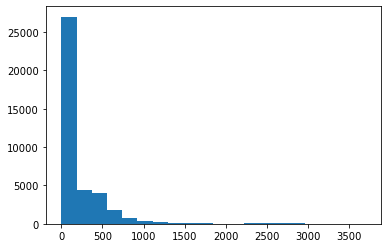

In [25]:
# remove row where diff is less than 0
lplesszero_index = lp[lp['diff'] < 0].index
lp.drop(lplesszero_index, inplace = True)
plt.hist(lp['diff'], bins=20)

We now create a new columns, `diffExist`. 

If the principal repayment amount is not equal to loan amount, then the `diffExist` for that `loanId` will be labelled as 1 whereas if If the principal repayment amount is equal to loan amount, then the `diffExist` for that `loanId` will be labelled as 0. 

Note that if the difference between the principal repayment amount and loan amount is between less than 1, the `diffExist` for that `loanId` will be labelled as 0 too. This is because the difference is insignificant and the small difference may arise due to decimal point round off.

In [26]:
# classify as 1 if diff is more than 1. 
# Note: Some diff might be more than 0 due to decimal point round off, so we assume that diff less than 1 is considered as 
# repaid fully

lp['diffExist'] = np.where(lp['diff'].between(0,1),0,1)
lp.diffExist.value_counts(normalize = True)

0    0.589905
1    0.410095
Name: diffExist, dtype: float64

#### Definition of Quality of Loan

Now we discuss what is consider a good quality and bad quality loan.

We will classify the quality of loan according to three criteria:

1. Loan with a ```loanStatus``` of either 'Paid Off Loan', 'New Loan', 'Returned Item' or 'Pending Paid Off' will be considered as good loan. All other loans will be considered as bad loan.
 * Reason for below ```loanStatus``` classified as good loan:
    * 'Paid Off Loan': Loan is paid off.
    * 'New Loan': Give the benefit of doubts and will decide according to criteria 2 and 3.
    * 'Returned Item': Only missed 1 payment for the whole tenure. We trade in risk for growth to be more competitive, meaning the company increase its risk tolerance to originate more loans.
    * 'Pending Paid Off': Loan is going to be paid off and just waiting for clearance from clearing house/system.
 * Reason for below ```loanStatus``` classified as bad loan:
    * 'External Collection' and 'Internal Collection': Since these loans requried the help from collection team to collect the loan, it means these loans has high probability of default and more resources are required to collect the loan. 
2. Loan which ```diffExist``` is 1 will be considred as bad loan.
 * Reason being principal amount is not fully paid.
3. Loan which ```isCollection``` is 1 will be considered as bad loan.
 * Loan that can't be repaid according to original schedule is considered as bad loan. Reason being addition resources is required to come out with custom made collection plan and risk of default increased.

We will get a sense on whether our criteria is reliable through data visualisation

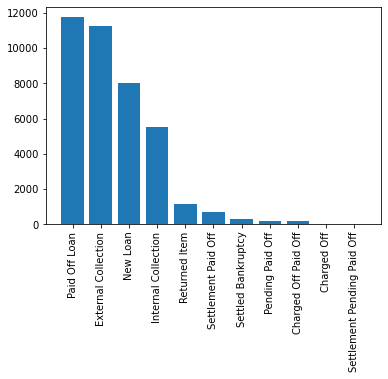

In [27]:
 #distribution of loanStatus in the data
ls_count = lp['loanStatus'].value_counts()
ls_count = ls_count[ls_count > 0]
ls_type = ls_count.index
plt.bar(ls_type, ls_count)
plt.xticks(rotation=90)
plt.show()

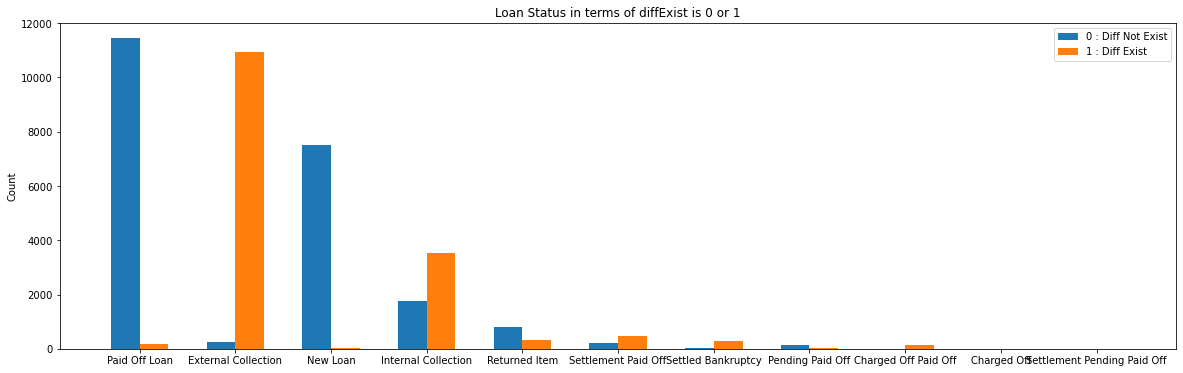

In [244]:
# data visualisation of diffExist by plotting group bar chart classify by loanStatus

de0 = [] # diffEixst is 0
de1 = [] # diffEixst is 1

for val in ls_type:
    de0.append(np.sum(lp['diffExist'][lp['loanStatus'] == val] == 0))
    de1.append(np.sum(lp['diffExist'][lp['loanStatus'] == val] == 1))


fig, ax = plt.subplots(figsize = (20,6))

x = np.arange(len(ls_type)) #label locations
width = 0.3 #width of the bar

bar0 = ax.bar(x - width/2, de0, width, label = '0 : Diff Not Exist') # bar of diffExist is 0
bar1 = ax.bar(x + width/2, de1, width, label = '1 : Diff Exist') # bar of diffExist is 1

ax.set_ylabel('Count')
ax.set_title('Loan Status in terms of diffExist is 0 or 1')
ax.set_xticks(x, ls_type)
ax.legend()

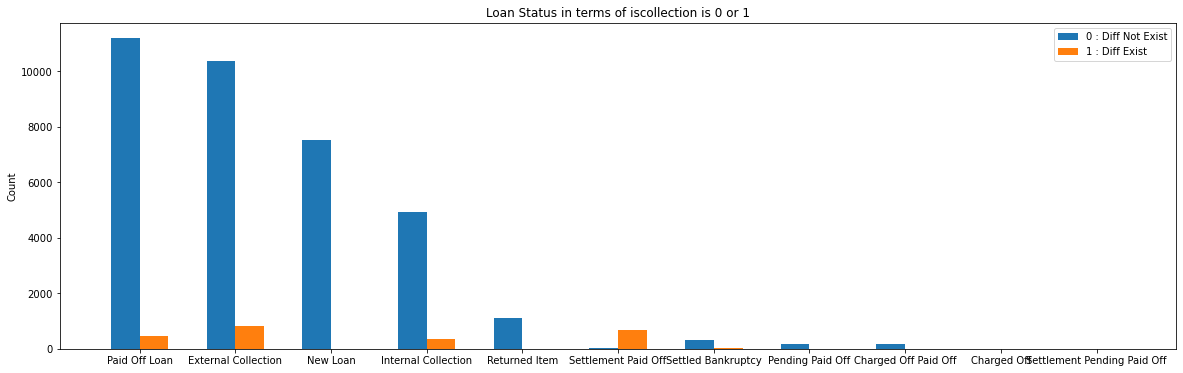

In [243]:
# data visualisation of isCollection by plotting group bar chart classify by loanStatus

ic0 = [] # isCollection is 0
ic1 = [] # isCollection is 1

for val in ls_type:
    ic0.append(np.sum(lp['isCollection'][lp['loanStatus'] == val] == 0))
    ic1.append(np.sum(lp['isCollection'][lp['loanStatus'] == val] == 1))


fig, ax = plt.subplots(figsize = (20,6))

x = np.arange(len(ls_type)) #label locations
width = 0.3 #width of the bar

bar0 = ax.bar(x - width/2, ic0, width, label = '0 : Diff Not Exist') # bar of isCollection is 0
bar1 = ax.bar(x + width/2, ic1, width, label = '1 : Diff Exist') # bar of isCollection is 1

ax.set_ylabel('Count')
ax.set_title('Loan Status in terms of iscollection is 0 or 1')
ax.set_xticks(x, ls_type)
ax.legend()

From the above group bar charts, it is safe to say the criteria is reliable where the porportion of 0 for ```loanStatus``` classify as good loan is always higher than that of 1.

#### Labelling of Quality of Loan

We now label our loan according to the criteria, with 0 indicates Good Loan while 1 indicates Bad Loan

In [30]:
goodLoan = ['Paid Off Loan', 'New Loan', 'Returned Item', 'Pending Paid Off']
lp['loanQuality'] = np.where(lp['loanStatus'].isin(goodLoan), 0, 1) # 1st criteria loan classification
lp.loc[lp['diffExist'] == 1, 'loanQuality'] = 1 # 2nd criteria loan classfication
lp.loc[lp['isCollection'] == 1, 'loanQuality'] = 1 # 3rd criteria loan classfication

In [31]:
lp.loanQuality.value_counts(normalize = True)

0    0.514626
1    0.485374
Name: loanQuality, dtype: float64

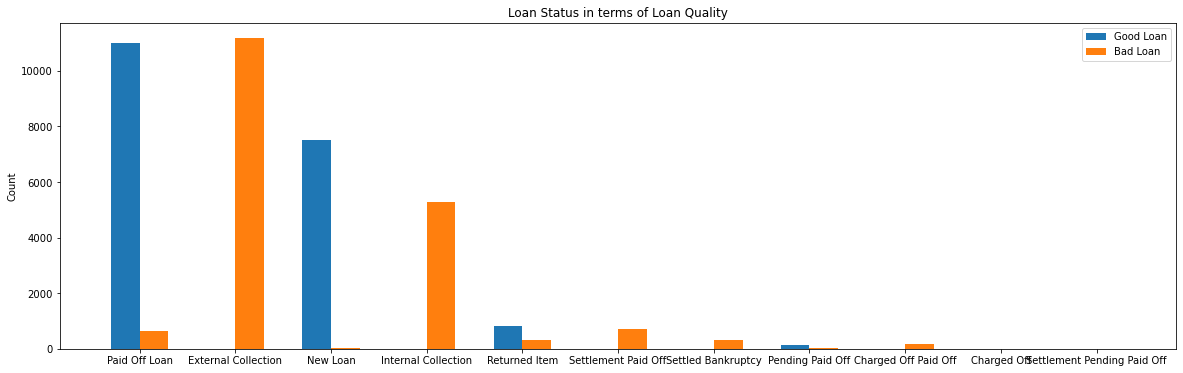

In [245]:
lq0 = [] # loanQuality is 0
lq1 = [] # loanQuality is 1

for val in ls_type:
    lq0.append(np.sum(lp['loanQuality'][lp['loanStatus'] == val] == 0))
    lq1.append(np.sum(lp['loanQuality'][lp['loanStatus'] == val] == 1))


fig, ax = plt.subplots(figsize = (20,6))

x = np.arange(len(ls_type)) #label locations
width = 0.3 #width of the bar

bar0 = ax.bar(x - width/2, lq0, width, label = 'Good Loan') # bar of loanQuality is 0
bar1 = ax.bar(x + width/2, lq1, width, label = 'Bad Loan') # bar of loanQUality is 1

ax.set_ylabel('Count')
ax.set_title('Loan Status in terms of Loan Quality')
ax.set_xticks(x, ls_type)
ax.legend()

#### Data Cleaning & Visualisation on ```loan``` table

Now we visualise the columns from the ```loan``` table to get a sense of the data.

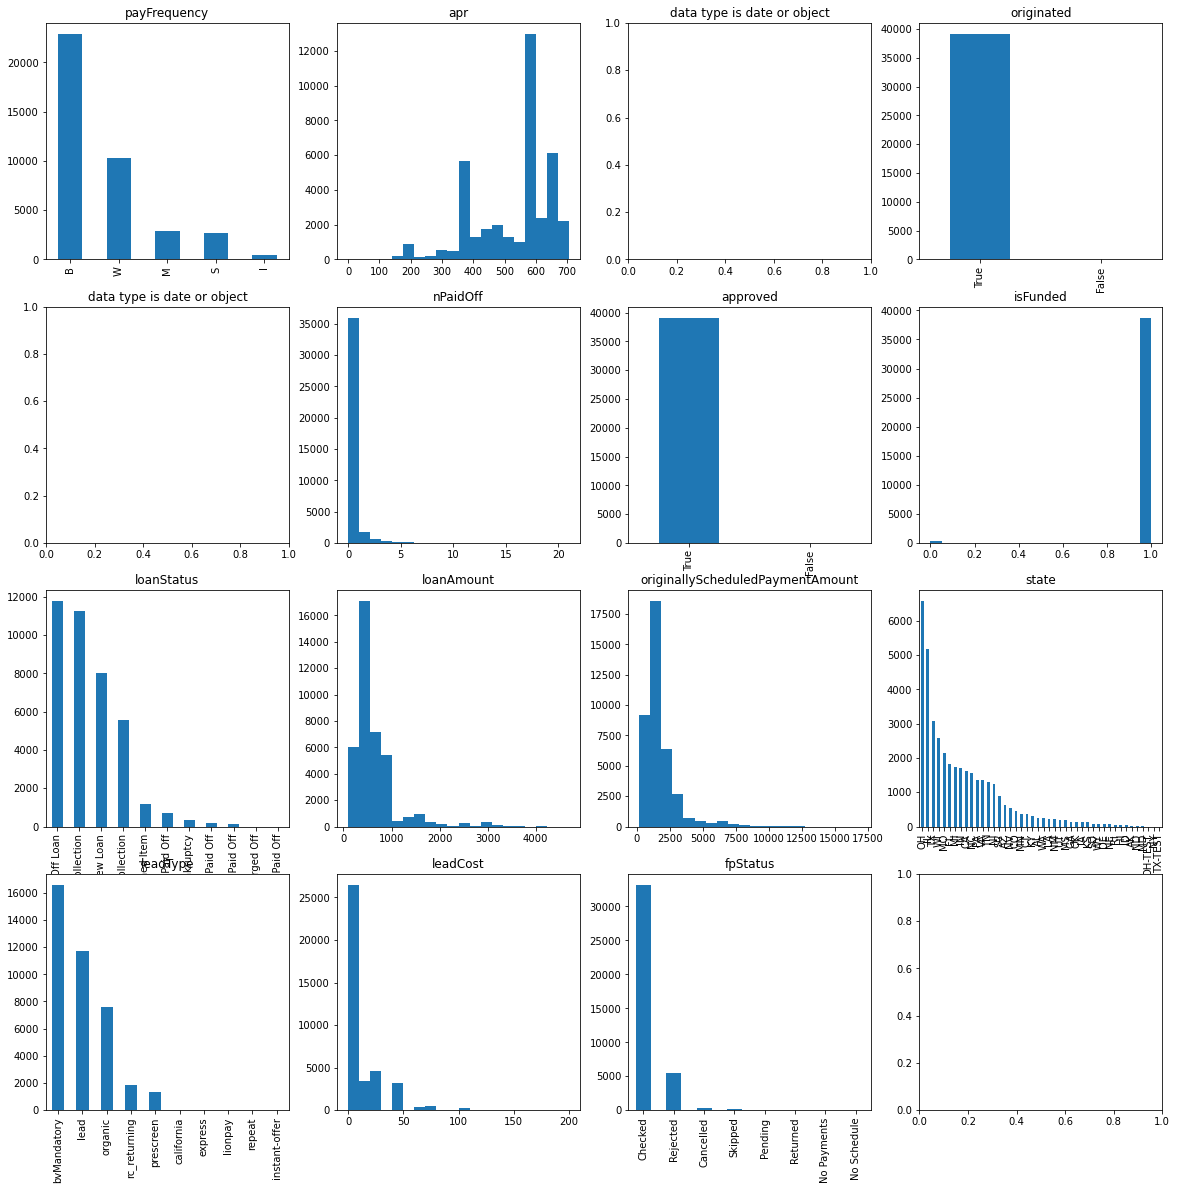

In [33]:
loanCol = lp.iloc[:,46:64]

figs, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.ravel()

for i in range(1,16):
    col = loanCol.columns[i]
    
    if loanCol[col].dtype == 'float' or loanCol[col].dtype == 'int64':
        axs[i-1].hist(loanCol[col], bins=20)
        axs[i-1].set_title(col)
        
    elif loanCol[col].dtype == 'category' or loanCol[col].dtype == 'bool':
        counts = loanCol[col].value_counts()
        counts.plot(kind = 'bar', ax = axs[i-1], title = col)
    
    else:
        axs[i-1].set_title('data type is date or object')

**Comment**: Most data are positively skewed with the existence of outliers.

In [34]:
loanCol.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,39108.000000,39108.000000,39108.000000,39108.000000,39108.000000,39108.000000,39108.000000
mean,527.990978,0.369694,0.989874,639.249949,1751.564654,11.964841,0.832259
std,124.339605,1.015730,0.100118,475.525619,1266.474437,20.229960,0.373641
min,0.000000,0.000000,0.000000,100.000000,187.620000,0.000000,0.000000
25%,449.990000,0.000000,1.000000,375.000000,1036.650000,0.000000,1.000000
50%,590.000000,0.000000,1.000000,500.000000,1379.000000,3.000000,1.000000
75%,601.000000,0.000000,1.000000,700.000000,2000.120000,10.000000,1.000000
max,705.590000,21.000000,1.000000,4687.000000,16868.150000,200.000000,1.000000


**Comment**

1. ```apr```: No anomalies.
2. ```nPaidOff```: Maximum value of 21 seems abnormally large compared to 3rd quartile value and mean value. 
3. ```loanAmount```: Maximum value seems abnormally large compared to 3rd quartile value and mean value.
4. ```originallyScheduledPaymentAmount```: Maximum value seems abnormally large compare to 3rd quartile value and mean value. Note that it is correlated with ```loanAmount```.
5. ```leadCost```: Maximum value value seems abnormally large compared to 3rd quartile value and mean value.

#### Replacing outlier values

#### nPaidOff

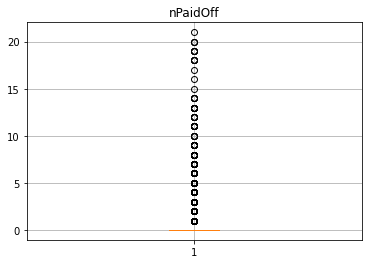

Number of loan where nPaidOff is more than 5: 222
The maximum number of loans that a customer had: 12


In [35]:
# plot boxplot of nPaidOff
plt.boxplot(loanCol['nPaidOff'])
plt.title('nPaidOff')
plt.grid()
plt.show()
nPOlarge5 = lp[lp['nPaidOff'] > 5].loanId.count()
maxNumLoan = lp['anon_ssn'].value_counts().max()
print(f'Number of loan where nPaidOff is more than 5: {nPOlarge5}')
print(f'The maximum number of loans that a customer had: {maxNumLoan}')

The maximum number of loans that a customer had is 12. Therefore, any loan with ```nPaidOff``` value greater than 12 is likely to be an error. From the histogram above, we can see that most loans have ```nPaidOff``` value of less than 5. This suggests that the 222 loans with ```nPaidOff``` value greater than 5 are likely to be errors. We are going to replace these values with 5, as we believe the customers of these 222 loans have paid off loans in the past and the number is likely to be large.

In [36]:
# replace nPaidOff of more than 5 with 5
lp.loc[lp['nPaidOff'] > 5, 'nPaidOff'] = 5

#### loanAmount

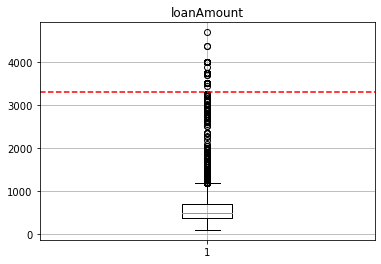

In [37]:
# plot boxplot of loanAmount
fig = plt.subplots()
plt.boxplot(loanCol['loanAmount'])
plt.axhline(y=3300, color='r', linestyle='--')
plt.title('loanAmount')
plt.grid()
plt.show()

From the box plot and histogram from above, we can conclude that the distribution for ```loanAmount``` is positively skewed. However, we suspect the ```loanAmount``` above 3300 might be outliers, which is well above 3 times the interquartile range and 3 times of standard deviation plus mean. Hence, we going to remove those rows.

This doesn't mean that the value is wrong since its possible to loan more than 3300 to a borrower. But the majority of the loan amount is below 3300 so we going to ignore those that are above 3300.

In [38]:
# remove loanAmount of more than 3300 
lplargeloan_index = lp[lp['loanAmount'] > 3300].index
lp.drop(lplargeloan_index, inplace = True)

#### originallyScheduledPaymentAmount

Since ```originallyScheduledPaymentAmount``` is dependent on ```loanAmount```, so we will look at the ratio of ```originallyScheduledPaymentAmount``` to ```loanAmount``` to check for outliers.

count    39000.000000
mean         2.785102
std          0.534528
min          1.000000
25%          2.302388
50%          2.915400
75%          3.178110
max          7.299911
Name: ospa2la, dtype: float64

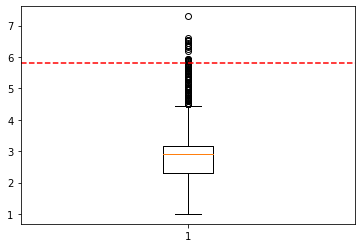

In [39]:
# create new column for ratio of originallyScheduledPaymentAmount to loanAmount
lp['ospa2la'] = lp['originallyScheduledPaymentAmount'] / lp['loanAmount']

# descirbe the column
ospa2la_des = lp['ospa2la'].describe()
display(ospa2la_des)

# plot boxplot
plt.boxplot(lp['ospa2la'])
y_ospa2la = 3 * (ospa2la_des.loc['75%'] - ospa2la_des.loc['25%']) + ospa2la_des.loc['75%'] # 3 times IQR + 3rd quartile value
plt.axhline(y=y_ospa2la, color='r', linestyle='--')
plt.show()

```loanId``` with ratio higher than 3 times the interquartile range plus the 3rd quartile value are considered as outliers and we are going to remove those loans.

In [40]:
# remove outliers
lpospa2la_index = lp[lp['ospa2la'] > y_ospa2la].index
lp.drop(lpospa2la_index, inplace = True)

#### leadCost

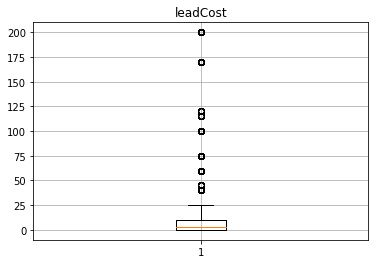

In [41]:
# plot boxplot of leadCost
plt.boxplot(loanCol['leadCost'])
#plt.axhline(y=3300, color='r', linestyle='--')
plt.title('leadCost')
plt.grid()
plt.show()

From the above box plot, we observed that value more than 25 is outliers. We will replace outliers with median.

In [42]:
# replace leadCost of more than 25 with median
lp.loc[lp['leadCost'] > 25, 'leadCost'] = int(lp.describe().loc['50%', 'leadCost'])

#### Data Cleaning on ```paymentStatus``` from ```payment``` table

Now we visualise the ```paymentStatus``` columns from the ```payment``` table to get a sense of the data.

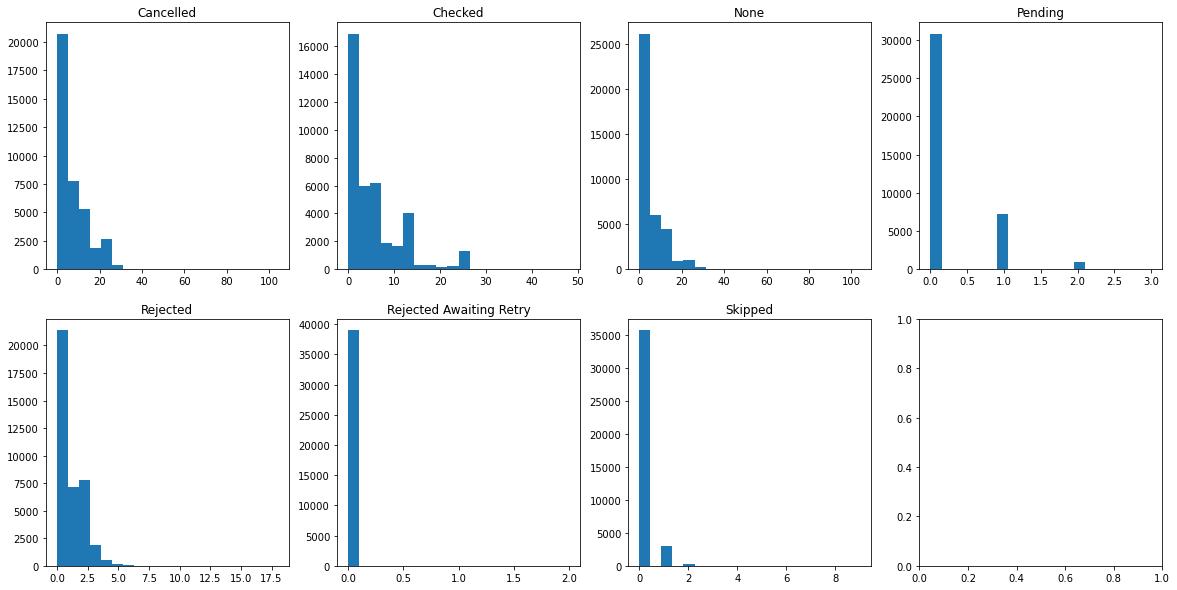

In [43]:
paymentStatusCols = lp.iloc[:,8:15]

figs, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for i in range(paymentStatusCols.shape[1]):
    col = paymentStatusCols.columns[i]
    
    axs[i].hist(paymentStatusCols[col], bins = 20)
    axs[i].set_title(col)

In [44]:
paymentStatusCols.describe()

,Cancelled,Checked,None,Pending,Rejected,Rejected Awaiting Retry,Skipped
count,38978.000000,38978.000000,38978.000000,38978.000000,38978.000000,38978.000000,38978.000000
mean,6.589923,5.327313,4.138976,0.235517,0.821284,0.000462,0.094925
std,7.951429,5.960066,6.511074,0.480685,1.090218,0.022648,0.328214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,8.000000,8.000000,0.000000,2.000000,0.000000,0.000000
max,104.000000,48.000000,104.000000,3.000000,18.000000,2.000000,9.000000


**Comment**: Observed that there are outliers in ```Cancelled```, ```Checked```, ```None``` and ```Rejected``` column.

Number of outliers for Cancelled: 80
Number of outliers for Checked: 28
Number of outliers for None: 77
Number of outliers for Rejected: 9


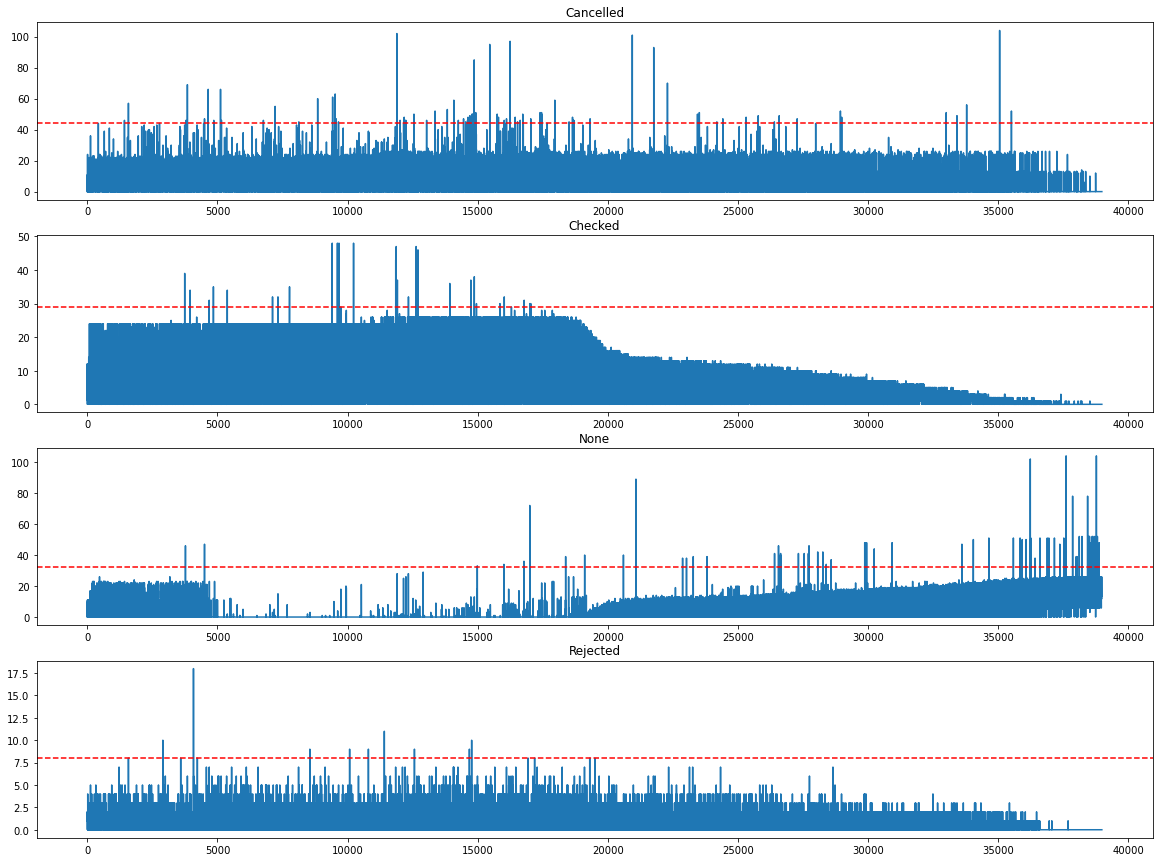

In [45]:
psOutliers = ['Cancelled', 'Checked', 'None', 'Rejected']

figs, axs = plt.subplots(len(psOutliers), 1, figsize=(20, 15))
axs = axs.ravel()

x = np.arange(paymentStatusCols.shape[0])

for i in range(len(psOutliers)):
    col = psOutliers[i]
    
    axs[i].plot(x, paymentStatusCols[col])
    axs[i].set_title(col)
    
    mean = paymentStatusCols.describe().loc['mean',col]
    std = paymentStatusCols.describe().loc['std',col]
    firstQ = paymentStatusCols.describe().loc['25%',col]
    thirdQ = paymentStatusCols.describe().loc['75%',col]
    IQR = thirdQ - firstQ
    y=3*IQR + thirdQ #condition of outlier
    axs[i].axhline(y=y, color='r', linestyle='--')
    
    outliersVal = paymentStatusCols[paymentStatusCols[col] > y]['Checked'].count()
    print(f'Number of outliers for {col}: {outliersVal}')

We can interpret the above graphs as time series, since the loans are recorded according to ```paymentDate```. We observed that the number of ```Checked``` is gradually decreasing while number of ```None``` is gradually increasing.This may be due to system error where most payment are recorded as ```None``` instead of other ```paymentStatus```.

To address this issue, we will remove the rows with outliers value in ```Cancelled```, ```Checked```, ```None``` and ```Rejected``` columns, as follows:

* Values that are more than 3 times the interquartile range (IQR) plus the third quartile value are considered outliers for the ```Cancelled```, ```Checked``` and ```Rejected``` columns.
* Values that are more than 3 times the standard deviation plus the mean value are considered outliers for the ```None``` column, as we suspect a system error and want to be more conservative.

In [46]:
# remove rows with outliers
for col in psOutliers:
    if col == 'None':
        mean = lp.describe().loc['mean',col] # mean
        std = lp.describe().loc['std',col] # standard deviation
        outlier = 3*std + mean # condition of outlier
        lpOutlier_index = lp[lp[col] > outlier].index # index of rows with outlier
        lp.drop(lpOutlier_index, inplace = True) # remove row
        
    else:
        firstQ = lp.describe().loc['25%',col] # 1st quartile
        thirdQ = lp.describe().loc['75%',col] # 3rd quartile
        IQR = thirdQ - firstQ # interquartile range
        outlier=3*IQR + thirdQ #condition of outlier
        lpOutlier_index = lp[lp[col] > outlier].index # index of rows with outlier
        lp.drop(lpOutlier_index, inplace = True) # remove row

#### Data Cleaning on ```paymentReturnCode``` from ```payment``` table

Now we visualise the ```paymentReturnCode``` columns from the ```payment``` table to get a sense of the data.

In [47]:
prcCols = lp.iloc[:,16:46]
prcCols.describe()

,C02,C03,C05,C07,LPP01,MISSED,R01,R02,R03,R04,...,R29,R99,RAF,RBW,RFG,RIR,RUP,RWC,RXL,RXS
count,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,...,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000
mean,0.000263,0.000893,0.002783,0.000053,0.000158,0.013942,0.591766,0.071286,0.007929,0.001024,...,0.000105,0.001313,0.001497,0.000131,0.000079,0.000026,0.000158,0.000184,0.000026,0.005855
std,0.016202,0.029865,0.148486,0.010248,0.012551,0.160379,0.986036,0.267414,0.093872,0.034359,...,0.010248,0.050710,0.044351,0.011457,0.008875,0.005124,0.012551,0.016994,0.005124,0.084773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,13.000000,2.000000,1.000000,5.000000,8.000000,3.000000,2.000000,3.000000,...,1.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


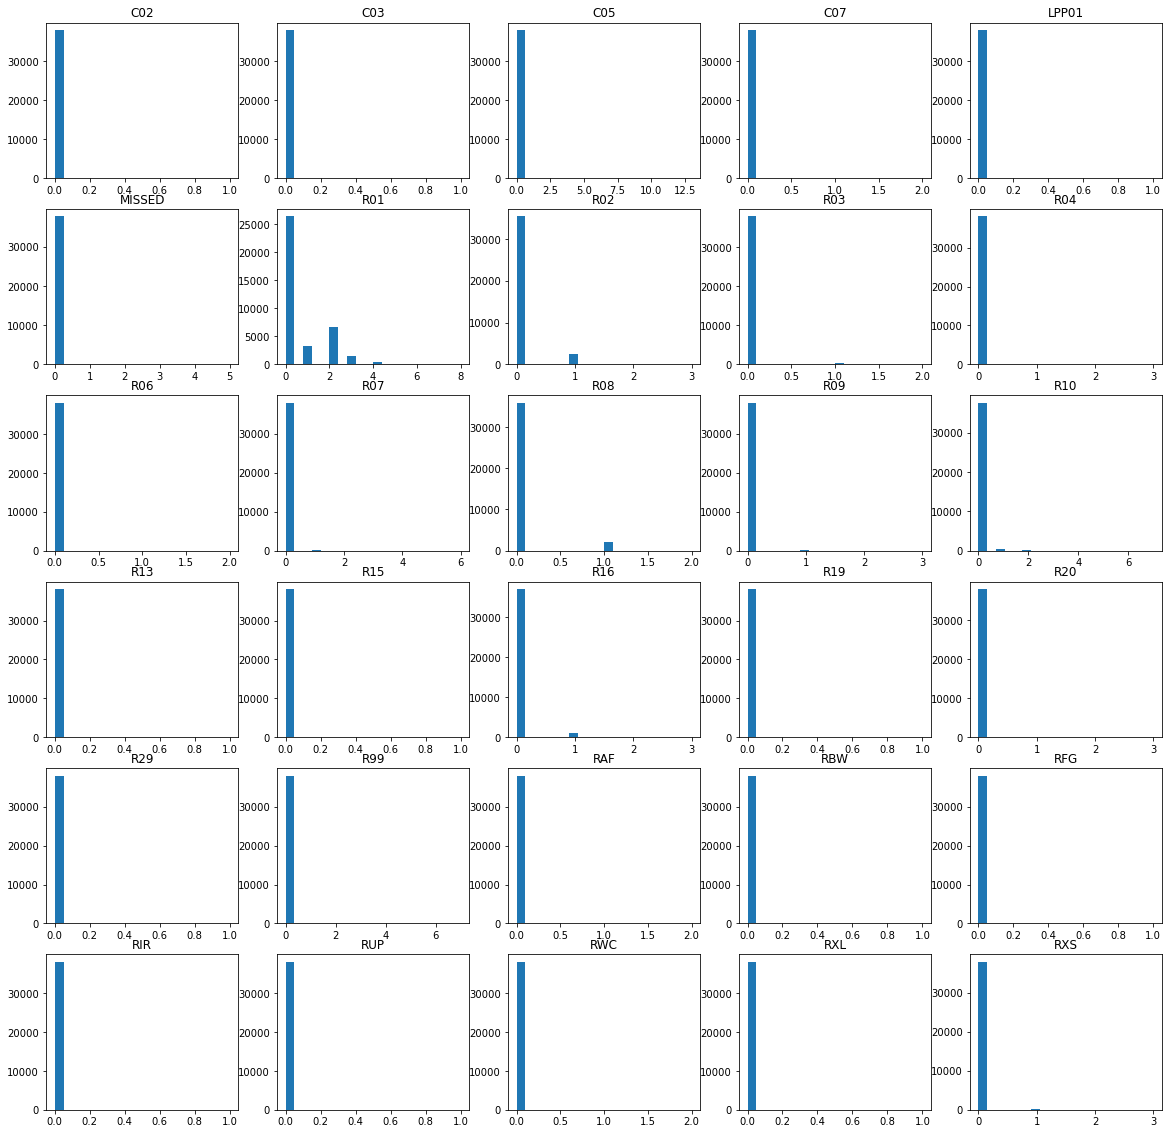

In [48]:
figs, axs = plt.subplots(6, 5, figsize=(20, 20))
axs = axs.ravel()

for i in range(prcCols.shape[1]):
    col = prcCols.columns[i]
    
    axs[i].hist(prcCols[col], bins = 20)
    axs[i].set_title(col)

**Comment**: From the above histograms, all values are below 15, which are reasonable. The most occur value is 'C05' with 13 appearance. Definition of 'C05' is incorrect payment code

#### Data Cleaning on other columns from ```payment``` table

Now we visualise the other columns from the ```payment``` table to get a sense of the data.

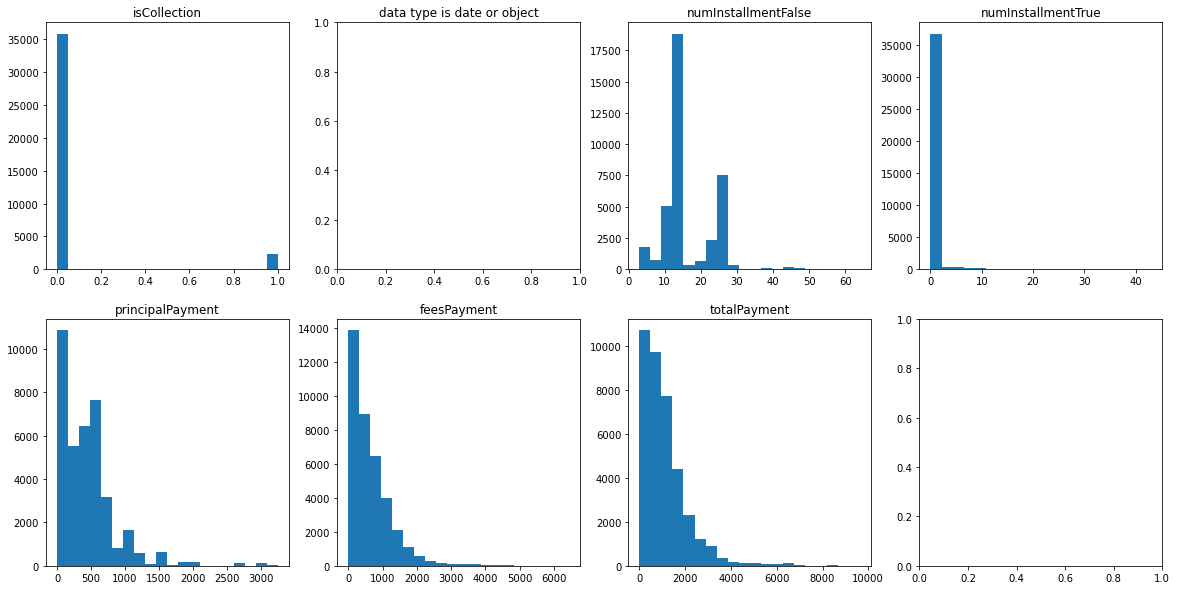

In [49]:
payCols = lp.iloc[:,1:8]

figs, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for i in range(7):
    col = payCols.columns[i]
    
    if payCols[col].dtype == 'float' or payCols[col].dtype == 'int64':
        axs[i].hist(payCols[col], bins=20)
        axs[i].set_title(col)
        
    elif payCols[col].dtype == 'category' or payCols[col].dtype == 'bool':
        counts = payCols[col].value_counts()
        counts.plot(kind = 'bar', ax = axs[i], title = col)
    
    else:
        axs[i].set_title('data type is date or object')

We will only focus on `numInstallmentFalse` and `numInstallmentTrue` since the ```principalPayment```, ```feesPayment``` and ```totalPayment``` columns is somewhat related to ```loanAmount``` and ```originallyScheduledPaymentAmount``` columns from the ```loan``` table and we have remove the outliers from those 2 columns.

In [50]:
numItm = payCols[['numInstallmentFalse', 'numInstallmentTrue']]
numItm.describe()

,numInstallmentFalse,numInstallmentTrue
count,38086.000000,38086.000000
mean,16.516647,0.332038
std,6.922472,1.845646
min,3.000000,0.000000
25%,13.000000,0.000000
50%,13.000000,0.000000
75%,24.000000,0.000000
max,64.000000,43.000000


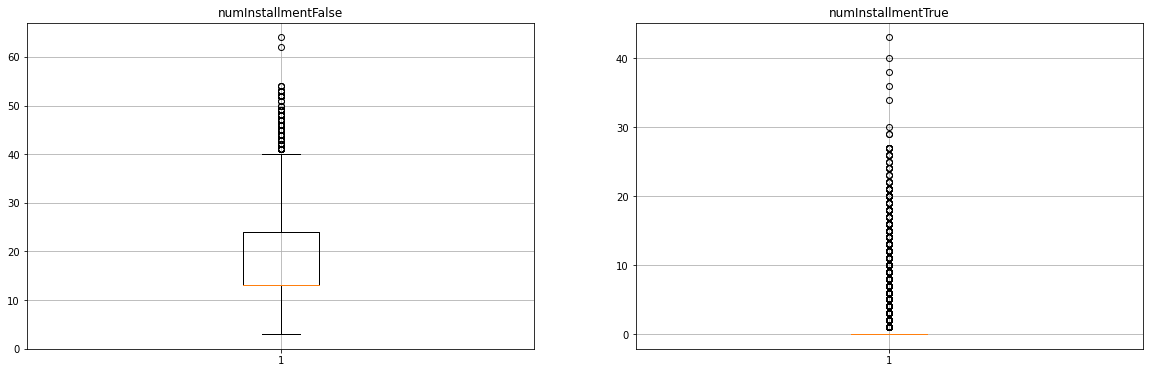

In [51]:
figs, axs = plt.subplots(1, 2, figsize=(20, 6))
axs = axs.ravel()

for i in range(numItm.shape[1]):
    col = numItm.columns[i]
    
    axs[i].boxplot(numItm[col])
    axs[i].set_title(col)
    axs[i].grid()

Clearly, there are loans with significantly large number of installments as compared to the majority of loans. However, this does not necessarily mean that they are outliers, as it is possible for loans to have such high number of installments. One of the reasons of high number of installments might due to payment keep getting rejected. Therefore, we will keep these values.

#### Exploratory Data Analysis (EDA) on ```loan``` table in relation to ```loanQuality```

In [52]:
# We first classify the data into categorical and numerical data

loanCat = lp[['payFrequency', 'state', 'leadType', 'fpStatus']]
loanNum = lp[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost']]

#### Categorical Data

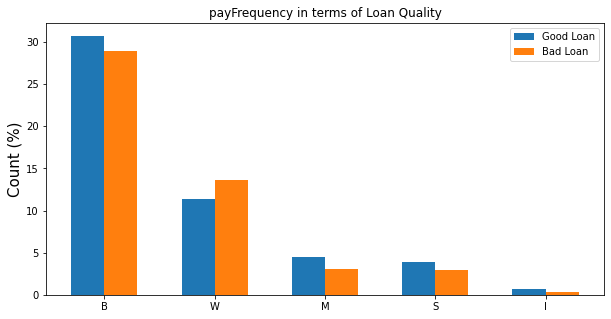

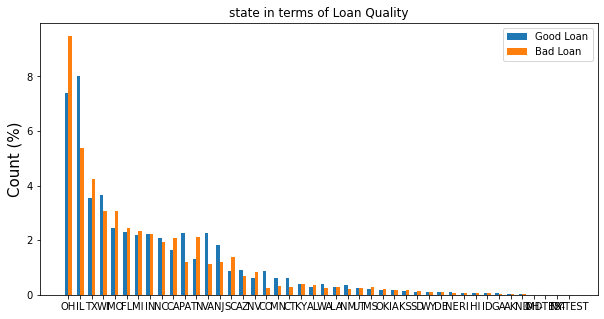

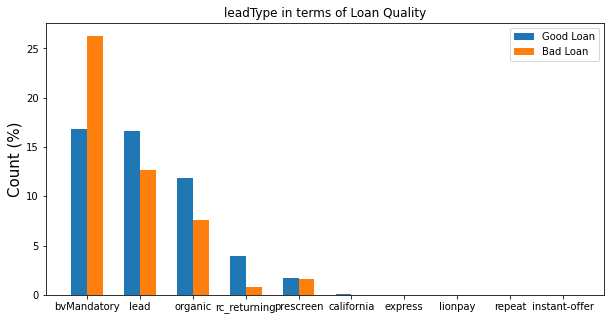

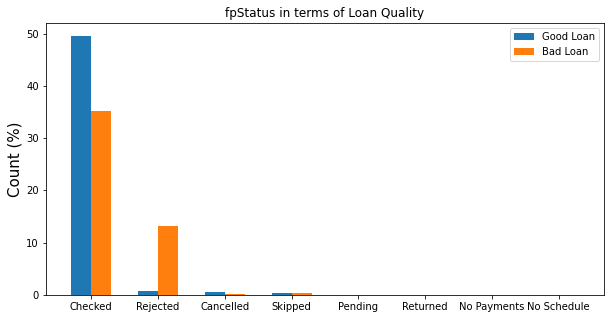

In [53]:
for col in loanCat.columns:
    temp = lp[col].value_counts()

    temp0 = [] # loanQuality is 0
    temp1 = [] # loanQuality is 1
    
    for val in temp.index:
        temp0.append(np.sum(lp['loanQuality'][lp[col] == val] == 0))
        temp1.append(np.sum(lp['loanQuality'][lp[col] == val] == 1))

    fig, ax = plt.subplots(figsize = (10,5))

    x = np.arange(len(temp.index)) #label locations
    width = 0.3 #width of the bar

    bar0 = ax.bar(x - width/2, temp0/temp.sum() * 100, width, label = 'Good Loan') # bar of loanQuality is 0
    bar1 = ax.bar(x + width/2, temp1/temp.sum() * 100, width, label = 'Bad Loan') # bar of loanQUality is 1

    ax.set_ylabel('Count (%)', fontsize = 15)
    ax.set_title(f'{col} in terms of Loan Quality')
    ax.set_xticks(x, temp.index)
    ax.legend()

**Comment**: 
* Weekly payment frequecy is the only ```paymentFrequency``` where the porportion of bad loan is higher.
* ```leadType``` of 'bvMandatory' has the highest portion of bad loan. It is the only lead type where bad loan is more than good loan.
* Loan from OH and TX ```state``` have higher bad loan whereas IL and WI have higher good loan.
* ```fpStatus``` of 'Checked' has more proportion of good loan whereas ```fpStatus``` of 'Rejected' has more proportion of bad loan, which is not surprising. 

#### Numerical Data

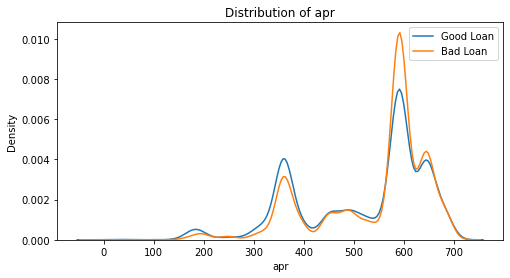

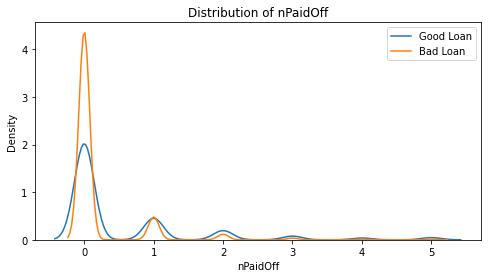

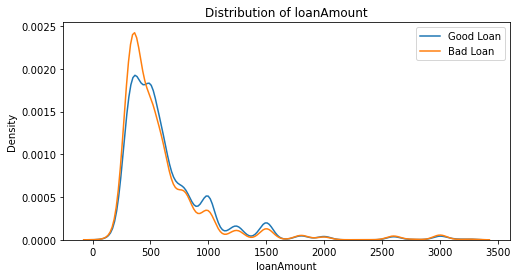

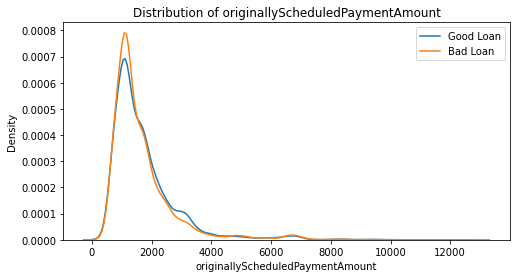

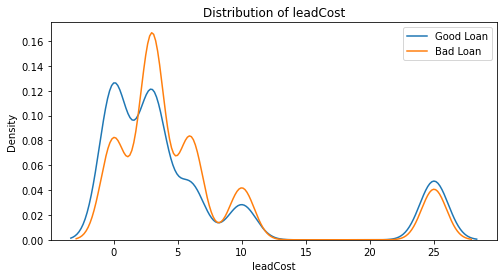

In [54]:
for col in loanNum:
    plt.figure(figsize = (8,4))

    # KDE plot of loans quality
    sns.kdeplot(lp[lp['loanQuality'] == 0][col], label = 'Good Loan')
    sns.kdeplot(lp[lp['loanQuality'] == 1][col], label = 'Bad Loan')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

**Comment**
* Density of bad loan is higher than that of good loan when ```apr``` is more than 500 and lower when ```apr``` is less than 500. This tells us that higher ```apr``` leads to worse quality of loan. Intuitively, this make sense as customers with lower credit worthiness will be charged a higher annual percentage rate.
* Lower ```nPaidOff``` has higher porpotion of bad loan, which make sense.
* Lower ```loanAmount``` has higher porpotion of bad loan than good loan. This is because customers with lower credit worthiness would be given lower amount of loan.
* ```originallyScheduledPaymentAmount``` has similar behaviour as ```loanAmount``` because both are positively correlated.
* Higher ```leadCost``` doesn't guarantee more good quality loans.

#### EDA on ```payment``` table

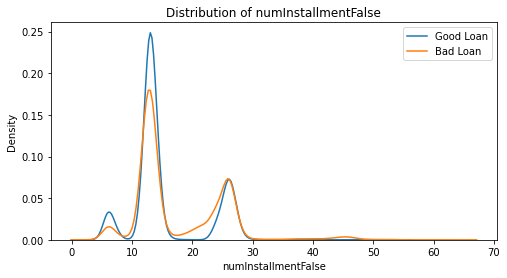

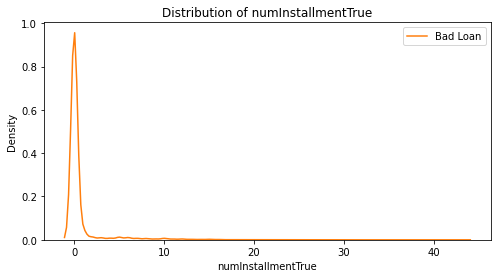

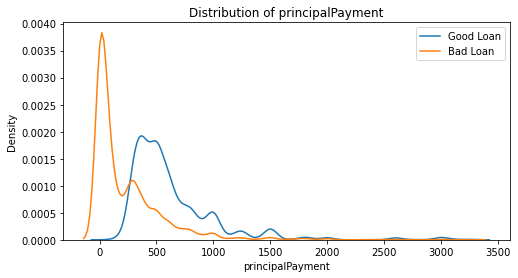

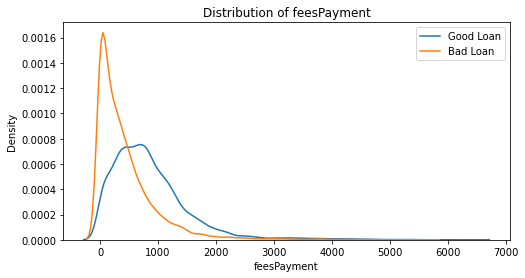

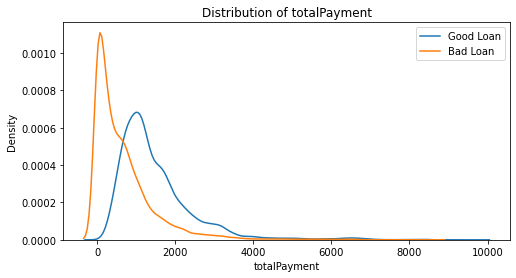

In [235]:
warnings.simplefilter("ignore")

payNum = ['numInstallmentFalse', 'numInstallmentTrue', 'principalPayment', 'feesPayment', 'totalPayment']
for col in payNum:
    plt.figure(figsize = (8,4))

    # KDE plot of loans quality
    sns.kdeplot(lp[lp['loanQuality'] == 0][col], label = 'Good Loan')
    sns.kdeplot(lp[lp['loanQuality'] == 1][col], label = 'Bad Loan')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

**Comment**
* As number of installment increase, proportion of bad loan increase
* Only loan with positive ```numInstallmentTrue``` is considered bad loan. Hence, no good loan distribution in the second graph.
* As expected, propotion of bad loan is high when payment amount is low.

#### Introduce ```clarity_underwriting_variables``` (cuv) table 

In [236]:
warnings.simplefilter("ignore")
cuv = pd.read_csv("D:\Documents\Moneylion\Data\clarity_underwriting_variables.csv")

In [57]:
cuv.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [58]:
cuv.shape

(49752, 54)

In [59]:
cuv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  49750 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             49750 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   49750 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     49750 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                  49750

In [60]:
cuv.iloc[:,9] = cuv.iloc[:,9].astype('bool')
cuv.iloc[:,11:30] = cuv.iloc[:,11:30].astype('bool')
cuv.iloc[:,31:38] = cuv.iloc[:,31:38].astype('bool')
cuv.iloc[:,38:51] = cuv.iloc[:,38:51].astype('category')

In [61]:
cuv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype   
---  ------                                                                                               --------------  -----   
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  49750 non-null  float64 
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             49750 non-null  float64 
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   49750 non-null  float64 
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     49750 non-null  float64 
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                 

In [62]:
cuv.isnull().sum()

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                                   2
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                           2
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                                       2
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                                2
.underwritingdatacl

#### Replacing null values

For columns with large number of null values (more than 10,000 rows with null values), we will replace the null value with 'Null'. 

For columns with category or boolean data type, we will replace null value with mode.

For columns with float or integer data type, we will replace null value with median as median is less sensitive to outliers.

In [63]:
cuvLargeNull = []
for col in cuv.isnull().sum().index:
    if cuv.isnull().sum()[col] > 10000:
        cuvLargeNull.append(col)
        
for i in range(len(cuvLargeNull)):
    col = cuvLargeNull[i]
    cuv[col] = cuv[cuvLargeNull[i]].cat.add_categories('Null').fillna('Null')  

In [64]:
for col in cuv.columns:
    if cuv.isnull().sum()[col] > 0:
        if cuv[col].dtype == 'category' or cuv[col].dtype == 'bool':
            cuv[col].fillna(cuv[col].mode().iloc[0], inplace = True)
        elif cuv[col].dtype == 'float':
            cuv[col].fillna(cuv[col].median(), inplace = True)

#### Merge exisitng dataFrame with ```cuv``` dataFrame

In [65]:
cuv = cuv.rename(columns={'underwritingid': 'clarityFraudId'}) # rename column 'underwritingid' to 'clarityFraudId'

In [66]:
lpcuv = pd.merge(lp, cuv, how='left', on='clarityFraudId')

As some of the ```loanId``` doesn't have ```clarityFraudId```, we will replace all the null values in the columns from the ```cuv``` table with 0.

In [67]:
index = lpcuv.columns.get_loc('ospa2la') + 1

for col in lpcuv.iloc[:,index:].columns:
    if lpcuv[col].dtype == 'category':
        lpcuv[col] = lpcuv[col].cat.add_categories(0).fillna(0)
    elif lpcuv[col].dtype == 'object':
        lpcuv[col] = lpcuv[col].fillna(0).astype('category')
    elif lpcuv[col].dtype == 'float':
        lpcuv[col] = lpcuv[col].fillna(0)
        
# can only run once. If error, run the below code then rerun the above code:
# lpcuv = pd.merge(lp, cuv, how='left', on='clarityFraudId')

#### Removing redundant columns

Columns that are redundant that will be removed:

1. loanId
2. isCollection
3. totalPayment
4. anon_ssn
5. originated
6. approved
7. isFunded
8. loanStatus
9. clarityFraudId
10. diff
11. diffExist

In [68]:
# remove columns that are redundant
todrop = ['loanId', 'isCollection', 'totalPayment', 'anon_ssn', 'originated', 'approved', 'isFunded', 
          'loanStatus', 'clarityFraudId', 'diff', 'diffExist']
lpcuv.drop(todrop, axis = 1, inplace = True)       

#### Correlation

,numInstallmentFalse,numInstallmentTrue,principalPayment,feesPayment,Cancelled,Checked,None,Pending,Rejected,Rejected Awaiting Retry,...,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
numInstallmentFalse,1.000000,0.042969,-0.013218,0.005802,0.498276,0.318492,0.188226,0.084958,0.189991,0.014022,...,-0.027799,-0.047734,-0.020506,-0.036213,-0.017930,-0.063731,-0.006770,-0.012104,-0.003732,-0.031034
numInstallmentTrue,0.042969,1.000000,0.012455,-0.070674,0.262580,0.064241,-0.094254,-0.072459,0.261302,0.117373,...,0.011483,0.037074,0.033231,0.001875,0.035277,0.032130,0.014912,0.023499,-0.001268,0.039016
principalPayment,-0.013218,0.012455,1.000000,0.716561,-0.311667,0.159235,0.312568,0.243798,-0.434741,-0.008920,...,-0.070474,-0.147390,-0.127187,-0.015676,-0.139418,-0.125234,-0.085847,-0.012833,-0.060599,0.113356
feesPayment,0.005802,-0.070674,0.716561,1.000000,-0.501527,0.236457,0.456734,0.353273,-0.330804,-0.009578,...,-0.018424,-0.098353,-0.080009,0.032668,-0.093560,-0.079701,-0.056319,-0.006388,-0.026076,0.117358
Cancelled,0.498276,0.262580,-0.311667,-0.501527,1.000000,-0.299285,-0.403087,-0.385833,0.433914,0.032041,...,0.010673,0.052755,0.050704,-0.005720,0.058838,0.035121,0.032307,0.001680,0.012647,0.009268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,-0.063731,0.032130,-0.125234,-0.079701,0.035121,-0.054984,-0.069486,-0.054774,0.069591,-0.005479,...,0.245070,0.725698,0.407269,0.171452,0.475599,1.000000,0.254570,0.087115,0.073808,0.175130
.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,-0.006770,0.014912,-0.085847,-0.056319,0.032307,-0.029034,-0.025810,-0.009975,0.053851,0.002229,...,0.331086,0.278677,0.323641,0.331352,0.317373,0.254570,1.000000,0.064498,0.310265,0.457552
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,-0.012104,0.023499,-0.012833,-0.006388,0.001680,-0.007126,-0.003123,-0.004618,0.004700,-0.001422,...,0.038328,0.068730,0.040756,0.030192,0.047322,0.087115,0.064498,1.000000,0.008020,0.020462
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,-0.003732,-0.001268,-0.060599,-0.026076,0.012647,-0.022608,-0.002596,0.010431,0.022111,0.000091,...,0.184668,0.101323,0.158824,0.196944,0.144632,0.073808,0.310265,0.008020,1.000000,0.262303


<AxesSubplot:>

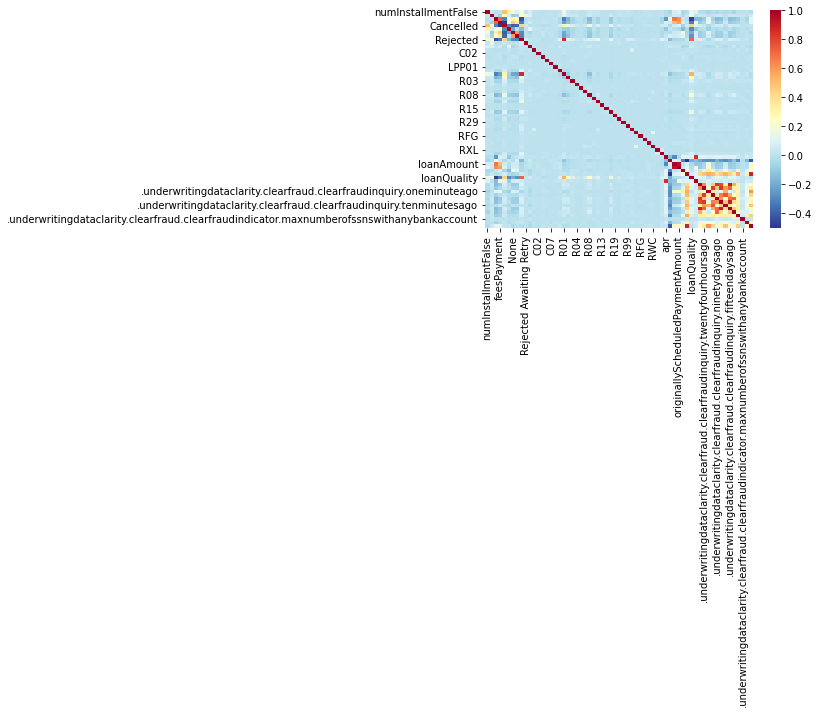

In [69]:
lpcuvCorr = lpcuv.corr()
display(lpcuvCorr)
sns.heatmap(lpcuvCorr, cmap = plt.cm.RdYlBu_r)

In [70]:
loanQualCorr = lpcuvCorr['loanQuality'].sort_values()

print(f'Most Positive Correlations: {loanQualCorr.tail(15)} \n')
print(f'Most Negative Correlations: {loanQualCorr.head(15)} \n')

Most Positive Correlations: ospa2la                                                                        0.100533
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago             0.108282
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago    0.111510
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago           0.118667
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago            0.126918
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago            0.132314
numInstallmentFalse                                                            0.134307
R16                                                                            0.165929
numInstallmentTrue                                                             0.183899
R08                                                                            0.249356
R02                                                                            0.269747
Canc

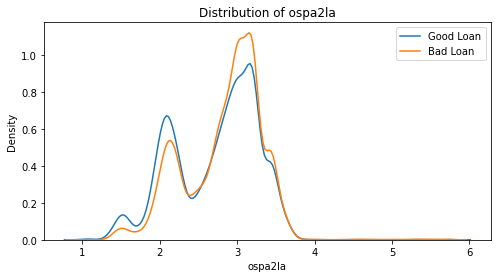

Correlation of ospa2la and loanQuality : 0.10053261324721827


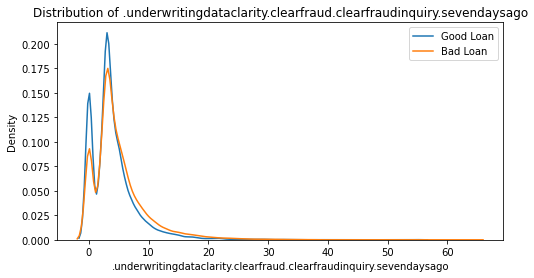

Correlation of .underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago and loanQuality : 0.1082824129104182


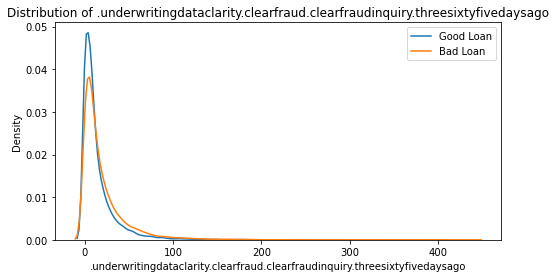

Correlation of .underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago and loanQuality : 0.11150952754438136


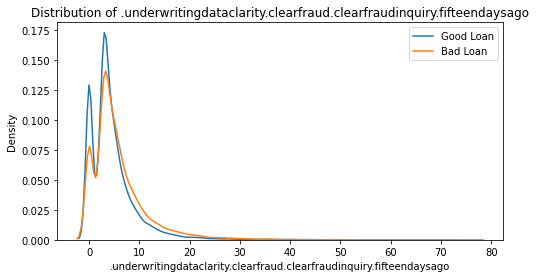

Correlation of .underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago and loanQuality : 0.1186668578046173


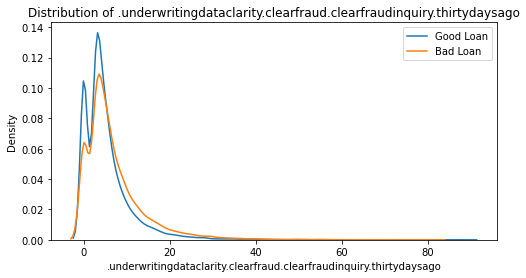

Correlation of .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago and loanQuality : 0.12691840838401103


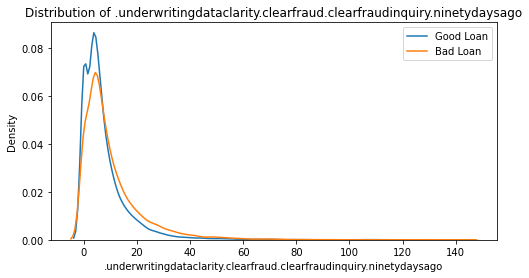

Correlation of .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago and loanQuality : 0.1323137801573848


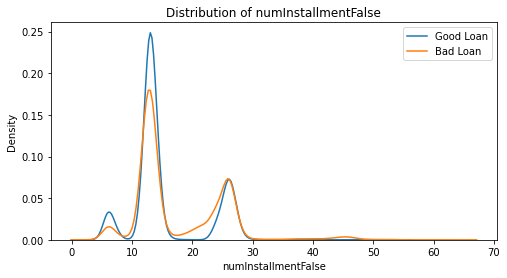

Correlation of numInstallmentFalse and loanQuality : 0.1343068812937572


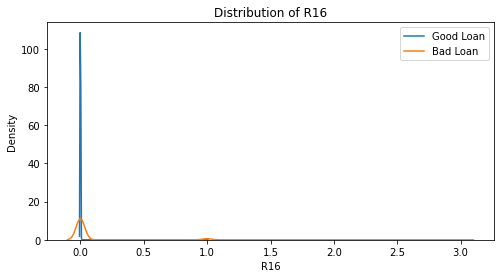

Correlation of R16 and loanQuality : 0.16592925596433028


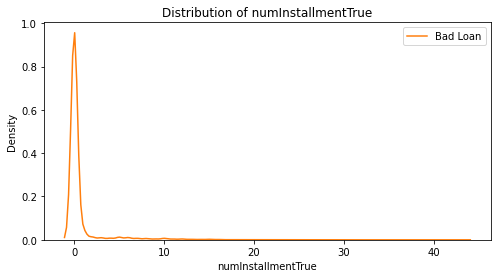

Correlation of numInstallmentTrue and loanQuality : 0.18389910771503715


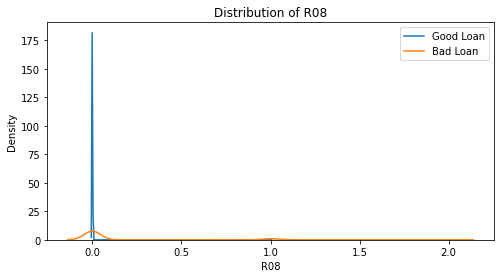

Correlation of R08 and loanQuality : 0.24935602799905493


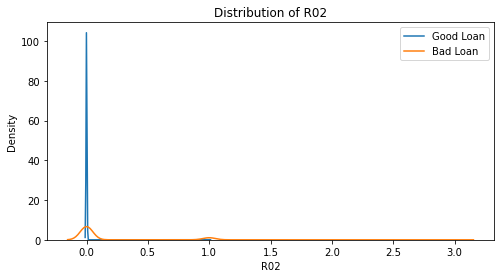

Correlation of R02 and loanQuality : 0.26974676204065845


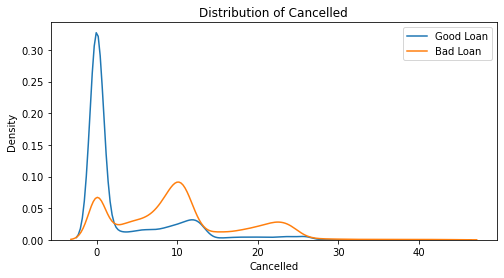

Correlation of Cancelled and loanQuality : 0.44100116118686855


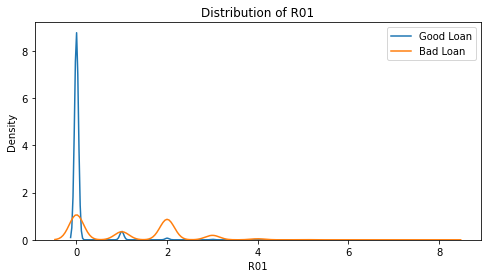

Correlation of R01 and loanQuality : 0.5481135791496745


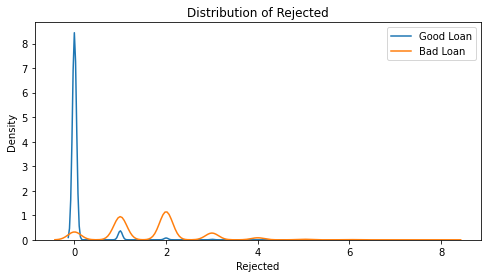

Correlation of Rejected and loanQuality : 0.7233157105776388


In [246]:
warnings.simplefilter("ignore")

# visualise the data that are most positively correlated with loanQuality
lQcolpos = loanQualCorr.tail(15).index[:14]
for col in lQcolpos:    
    plt.figure(figsize = (8,4))

    # KDE plot of loans quality
    sns.kdeplot(lpcuv[lpcuv['loanQuality'] == 0][col], label = 'Good Loan')
    sns.kdeplot(lpcuv[lpcuv['loanQuality'] == 1][col], label = 'Bad Loan')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
    correlation = loanQualCorr.tail(15)[col]
    print(f'Correlation of {col} and loanQuality : {correlation}')

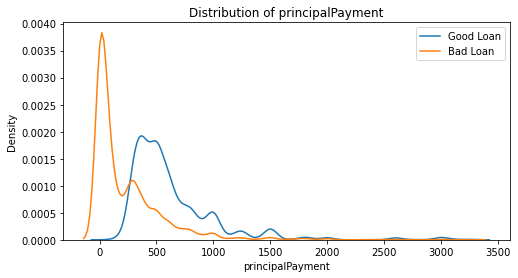

Correlation of principalPayment and loanQuality : -0.4741102843555096


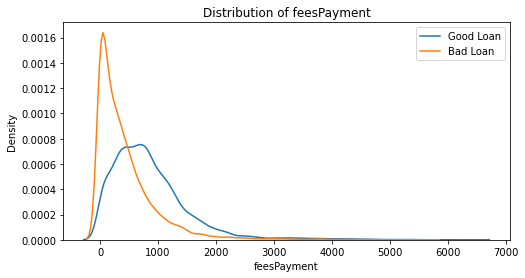

Correlation of feesPayment and loanQuality : -0.3234780893246281


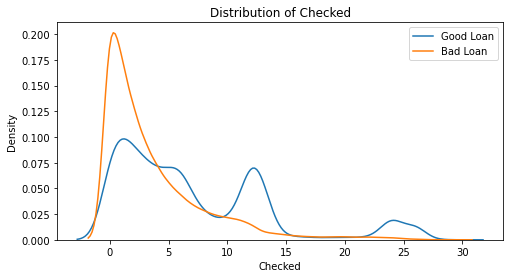

Correlation of Checked and loanQuality : -0.294145774590596


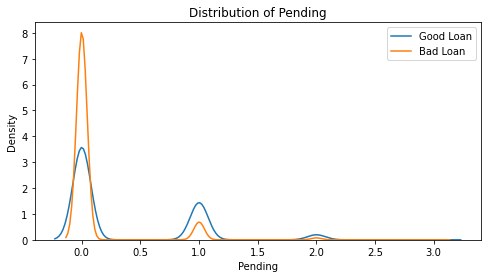

Correlation of Pending and loanQuality : -0.2709724481640335


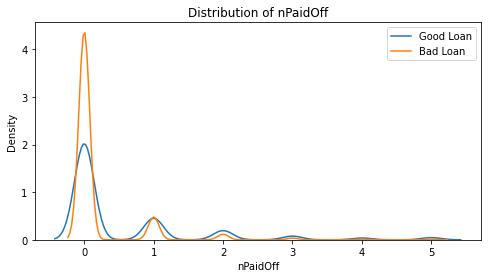

Correlation of nPaidOff and loanQuality : -0.1945224270764786


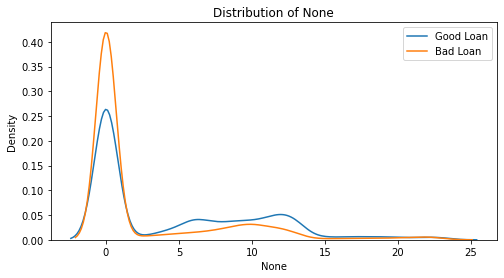

Correlation of None and loanQuality : -0.1873649193016582


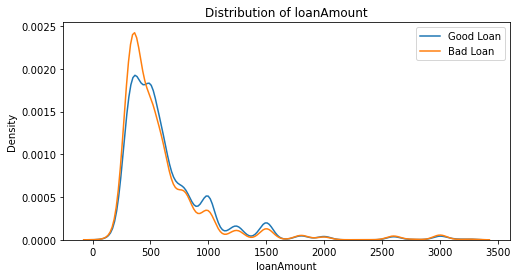

Correlation of loanAmount and loanQuality : -0.049695747504848044


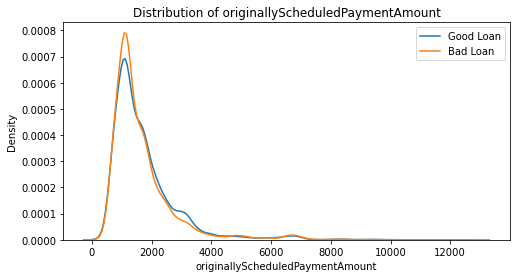

Correlation of originallyScheduledPaymentAmount and loanQuality : -0.024284893399586702


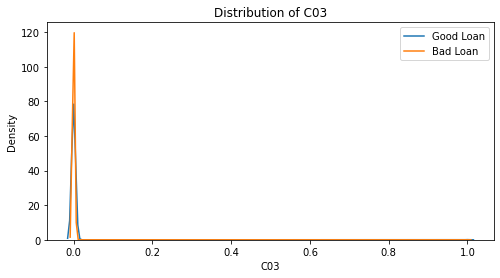

Correlation of C03 and loanQuality : -0.015172544288572794


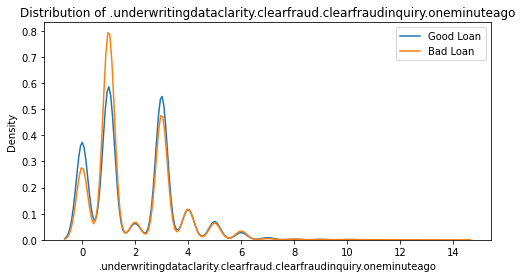

Correlation of .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago and loanQuality : -0.01447270902160867


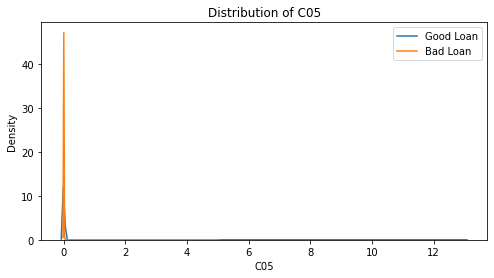

Correlation of C05 and loanQuality : -0.010554518120678624


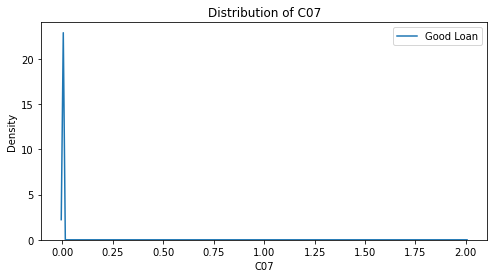

Correlation of C07 and loanQuality : -0.005012894728008273


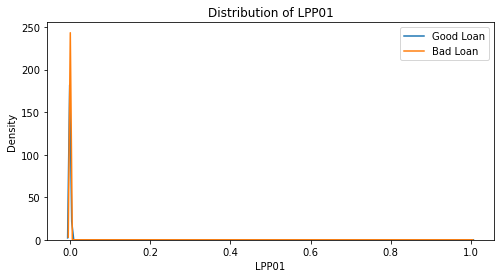

Correlation of LPP01 and loanQuality : -0.003909549522160511


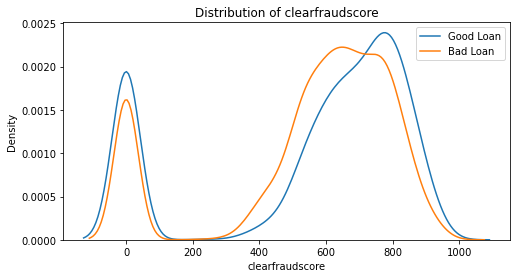

Correlation of clearfraudscore and loanQuality : -0.0020592721212992935


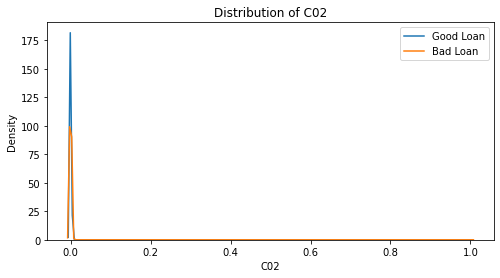

Correlation of C02 and loanQuality : 0.003597781403058454


In [247]:
warnings.simplefilter("ignore")
# visualise the data that are most negatively correlated with loanQuality
lQcolneg = loanQualCorr.head(15).index
for col in lQcolneg:
    plt.figure(figsize = (8,4))

    # KDE plot of loans quality
    sns.kdeplot(lpcuv[lpcuv['loanQuality'] == 0][col], label = 'Good Loan')
    sns.kdeplot(lpcuv[lpcuv['loanQuality'] == 1][col], label = 'Bad Loan')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
    correlation = loanQualCorr.head(15)[col]
    print(f'Correlation of {col} and loanQuality : {correlation}')

#### Featuring Engineering

We will include several new columns related to date data type:

* ```fPYear```: First payment year
* ```oriYear```: Origination year
* ```appYear```: Application year
* ```oriWeek```: Ordinal number of the week of a year where origination is made
* ```appWeek```: Ordinal number of the week of a year where application is made
* ```fPWeek```: Ordinal number of the week of a year where first payment is made
* ```oriDay```: Ordinal number of the day of a month where origination is made
* ```appDay```: Ordinal number of the day of a month where application is made
* ```fPDay```: Ordinal number of the day of a month where first payment is made
* ```diffAppOri```: Time taken from application to origination in minutes
* ```diffOrifP```: Time taken from origination to first payment in days

In [73]:
# include new columns to get info out from date
lpcuv['paymentDate'] = lpcuv['paymentDate'].astype('datetime64')

lpcuv.insert(lpcuv.columns.get_loc('paymentDate')+1, 'fPYear', lpcuv['paymentDate'].dt.year) # column for fPYear
lpcuv.insert(lpcuv.columns.get_loc('paymentDate')+2, 'fPWeek', lpcuv['paymentDate'].dt.isocalendar().week.astype("int64")) # column for fPWeek
lpcuv.insert(lpcuv.columns.get_loc('paymentDate')+3, 'fPDay', lpcuv['paymentDate'].dt.day) # column for fPDay

lpcuv.insert(lpcuv.columns.get_loc('originatedDate')+1, 'oriYear', lpcuv['originatedDate'].dt.year) # column for oriYear
lpcuv.insert(lpcuv.columns.get_loc('originatedDate')+2, 'oriWeek', lpcuv['originatedDate'].dt.isocalendar().week.astype("int64")) # column for oriWeek
lpcuv.insert(lpcuv.columns.get_loc('originatedDate')+3, 'oriDay', lpcuv['originatedDate'].dt.day) # column for oriDay

lpcuv.insert(lpcuv.columns.get_loc('applicationDate')+1, 'appYear', lpcuv['applicationDate'].dt.year) # column for appYear
lpcuv.insert(lpcuv.columns.get_loc('applicationDate')+2, 'appWeek', lpcuv['applicationDate'].dt.isocalendar().week.astype("int64")) # column for appWeek
lpcuv.insert(lpcuv.columns.get_loc('applicationDate')+3, 'appDay', lpcuv['applicationDate'].dt.day) # column for appDay

lpcuv['diffAppOri'] = (lpcuv['originatedDate'] - lpcuv['applicationDate']).dt.total_seconds()/60 # column for diffAppOri in minutes
lpcuv['diffOrifP'] = (lpcuv['paymentDate'] - lpcuv['originatedDate']).dt.total_seconds()/86400 # column for diffOrifP in days

Now we remove ```paymentDate```, ```originatedDate``` and ```applicationDate``` from the table.

In [74]:
# remove date columns from the table
dateCol = ['paymentDate', 'originatedDate', 'applicationDate']
lpcuv.drop(dateCol, axis=1, inplace=True)

In [75]:
# convert lpcuvEncode dataframe into csv
lpcuv.to_csv('lpcuvBeforeEncode.csv')

#### Encode categorical data

Now, we will encode categorical data to convert them into numerical data as machine learning models are able to read numerical data.

For categorical data that were extracted from the ```loan``` table, we will implement One Hot Encoding while for categorical data that were extracted from the ```clarity_underwriting_variables (cuv)``` table, we will implement Label Encoding.

In [78]:
lpcuvEncode = lpcuv.copy() # will use 'lpcuvEncode' table instead of 'lpcuv' table

In [79]:
# rename value in the fpStatus column to avoid same column name after encoding
lpcuvEncode['fpStatus'] = (lpcuvEncode['fpStatus'].astype('str') + '_fpStatus').astype('category')

In [80]:
# encode categorical data extracted from loan table
index = lpcuvEncode.columns.get_loc('ospa2la') + 1

for col in lpcuvEncode.iloc[:,:index].columns:
    if lpcuvEncode[col].dtype == 'category':
        encode = pd.get_dummies(lpcuvEncode[col]).astype('int8')
        lpcuvEncode = pd.concat([lpcuvEncode, encode], axis=1) 
        lpcuvEncode.drop(col, axis=1, inplace=True)

In [81]:
# encode categorical data extracted from cuv table
index = lpcuvEncode.columns.get_loc('ospa2la') + 1

for col in lpcuvEncode.iloc[:,index:].columns:
    if lpcuvEncode[col].dtype == 'category':
        lpcuvEncode[col] = lpcuvEncode[col].cat.codes

In [82]:
for col in lpcuvEncode.columns:
    if lpcuvEncode[col].value_counts().values[0] == lpcuvEncode.shape[0]:
        lpcuvEncode.drop(col, axis=1, inplace=True)

In [83]:
# convert lpcuvEncode dataframe into csv
lpcuvEncode.to_csv('loanCleaned.csv')

After thoroughly cleaning the data, we are now prepared to proceed with training our machine learning model.

First, we relook again on the correlation of each attributes with respect to `loanQuality`.

#### Correlation

,fPYear,fPWeek,fPDay,numInstallmentFalse,numInstallmentTrue,principalPayment,feesPayment,Cancelled,Checked,None,...,organic,prescreen,rc_returning,repeat,Cancelled_fpStatus,Checked_fpStatus,Pending_fpStatus,Rejected_fpStatus,Returned_fpStatus,Skipped_fpStatus
fPYear,1.000000,-0.612653,-0.064888,-0.181386,-0.078052,0.186680,0.211139,-0.198743,-0.315702,0.387000,...,-0.037388,-0.010004,0.113555,-0.002055,0.010694,-0.008364,0.009343,0.006624,-0.014968,-0.002255
fPWeek,-0.612653,1.000000,0.184471,0.082754,0.040407,-0.117429,-0.106606,0.127711,0.173171,-0.268656,...,0.008941,0.022656,0.049048,-0.002701,0.003956,0.004493,-0.000623,-0.005854,0.007214,0.000945
fPDay,-0.064888,0.184471,1.000000,-0.022718,-0.001455,0.009468,0.030430,-0.006169,-0.010644,-0.003693,...,-0.017818,0.014998,0.000376,-0.001444,0.002481,-0.003637,-0.001305,0.007087,0.001450,-0.017981
numInstallmentFalse,-0.181386,0.082754,-0.022718,1.000000,0.042969,-0.013218,0.005802,0.498276,0.318492,0.188226,...,-0.017035,0.048779,-0.062101,0.001814,-0.021974,0.001374,-0.012609,0.001751,0.005539,0.010121
numInstallmentTrue,-0.078052,0.040407,-0.001455,0.042969,1.000000,0.012455,-0.070674,0.262580,0.064241,-0.094254,...,0.015380,0.045533,-0.025728,0.000936,0.007693,-0.045303,-0.001844,0.043733,-0.000922,0.006762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Checked_fpStatus,-0.008364,0.004493,-0.003637,0.001374,-0.045303,0.214115,0.230200,-0.272649,0.326190,0.057039,...,0.070363,0.009323,0.025745,0.006527,-0.189904,1.000000,-0.024139,-0.952258,-0.012069,-0.177464
Pending_fpStatus,0.009343,-0.000623,-0.001305,-0.012609,-0.001844,0.000847,0.005134,-0.008871,-0.007195,0.004318,...,-0.005037,-0.001876,0.009708,-0.000158,-0.000826,-0.024139,1.000000,-0.004144,-0.000053,-0.000772
Rejected_fpStatus,0.006624,-0.005854,0.007087,0.001751,0.043733,-0.226689,-0.224190,0.263750,-0.321137,-0.048758,...,-0.074814,-0.007471,-0.063719,-0.006216,-0.032599,-0.952258,-0.004144,1.000000,-0.002072,-0.030463
Returned_fpStatus,-0.014968,0.007214,0.001450,0.005539,-0.000922,-0.005202,-0.004776,0.010304,-0.003814,-0.003406,...,-0.002518,-0.000938,-0.001149,-0.000079,-0.000413,-0.012069,-0.000053,-0.002072,1.000000,-0.000386


<AxesSubplot:>

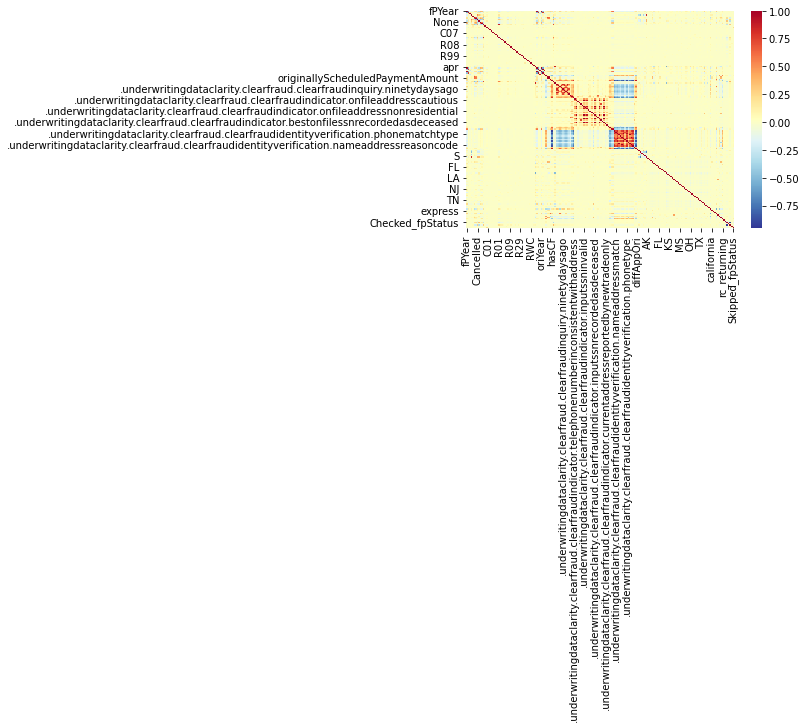

In [84]:
corr = lpcuvEncode.corr()
display(corr)
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r)

In [85]:
loanQualCorrC = corr['loanQuality'].sort_values()

print(f'Most Positive Correlations: {loanQualCorrC.tail(15)} \n')
print(f'Most Negative Correlations: {loanQualCorrC.head(15)} \n')

Most Positive Correlations: .underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago    0.111510
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago           0.118667
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago            0.126918
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago            0.132314
numInstallmentFalse                                                            0.134307
R16                                                                            0.165929
numInstallmentTrue                                                             0.183899
bvMandatory                                                                    0.209070
R08                                                                            0.249356
R02                                                                            0.269747
Rejected_fpStatus                                                              0.367634
Canc

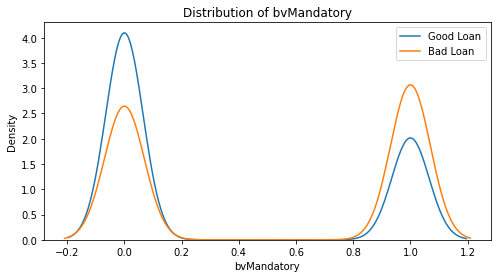

Correlation of bvMandatory and loanQuality : 0.20907016785697666


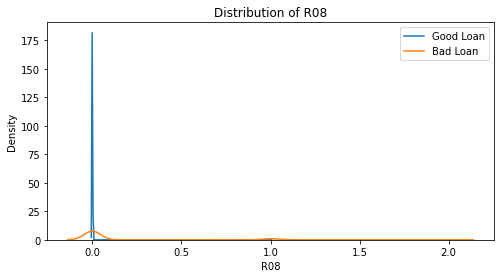

Correlation of R08 and loanQuality : 0.24935602799905493


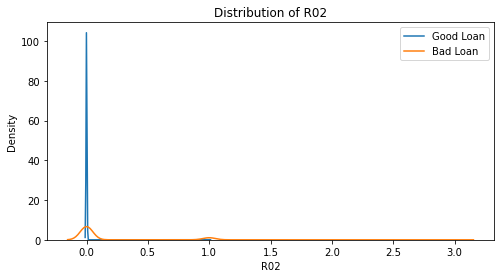

Correlation of R02 and loanQuality : 0.26974676204065845


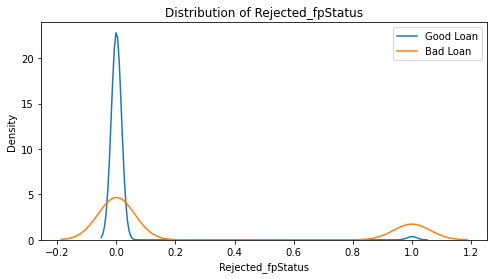

Correlation of Rejected_fpStatus and loanQuality : 0.36763368516165196


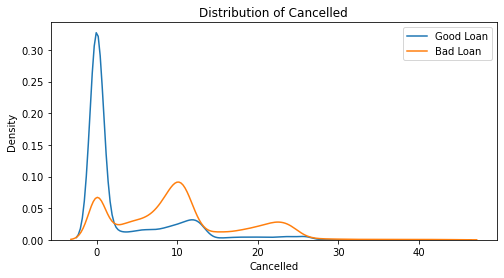

Correlation of Cancelled and loanQuality : 0.44100116118686855


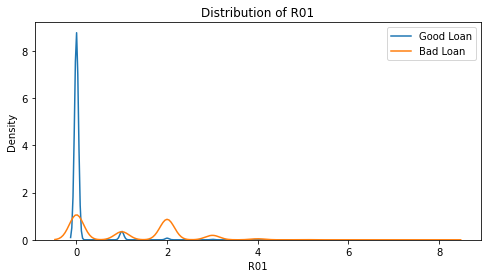

Correlation of R01 and loanQuality : 0.5481135791496745


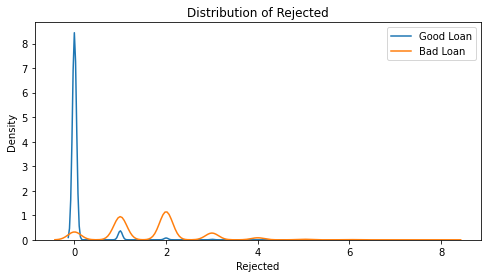

Correlation of Rejected and loanQuality : 0.7233157105776388


In [119]:
# visualise the data that are positively correlated with loanQuality
lQpos = loanQualCorrC[loanQualCorrC > 0.2][:-1]

for col in lQpos.index:    
    plt.figure(figsize = (8,4))

    # KDE plot of loans quality
    sns.kdeplot(lpcuvEncode[lpcuvEncode['loanQuality'] == 0][col], label = 'Good Loan')
    sns.kdeplot(lpcuvEncode[lpcuvEncode['loanQuality'] == 1][col], label = 'Bad Loan')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
    correlation = lQpos[col]
    print(f'Correlation of {col} and loanQuality : {correlation}')

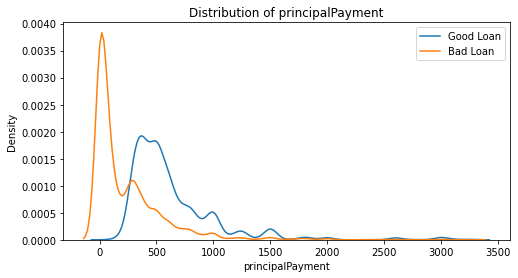

Correlation of principalPayment and loanQuality : -0.4741102843555096


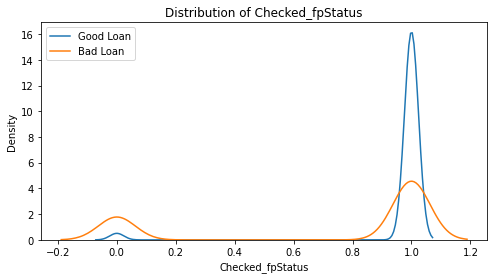

Correlation of Checked_fpStatus and loanQuality : -0.34726959441969074


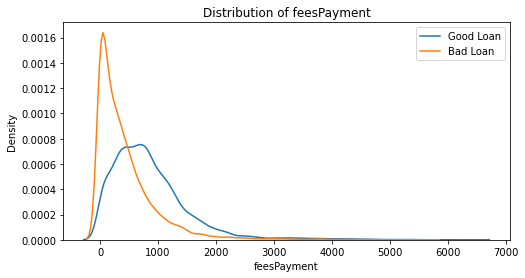

Correlation of feesPayment and loanQuality : -0.3234780893246281


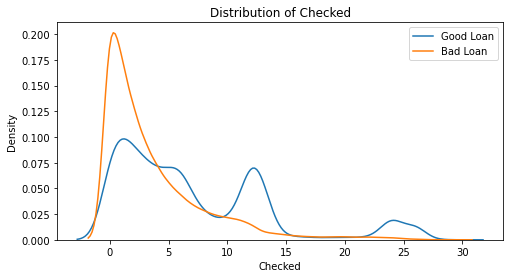

Correlation of Checked and loanQuality : -0.294145774590596


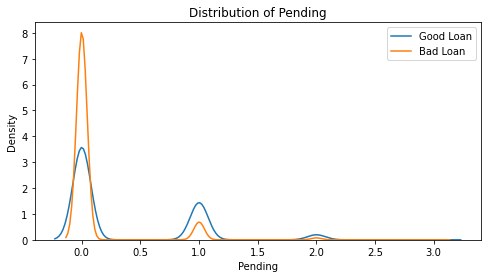

Correlation of Pending and loanQuality : -0.2709724481640335


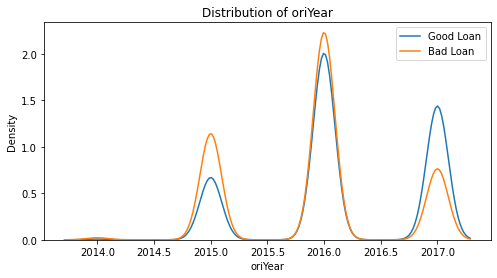

Correlation of oriYear and loanQuality : -0.20125061723789497


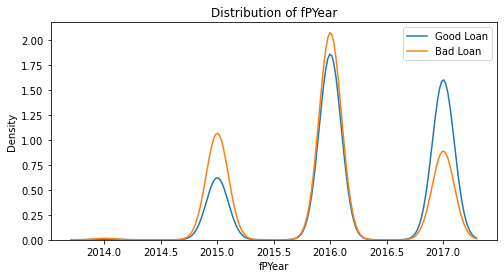

Correlation of fPYear and loanQuality : -0.20123302201418927


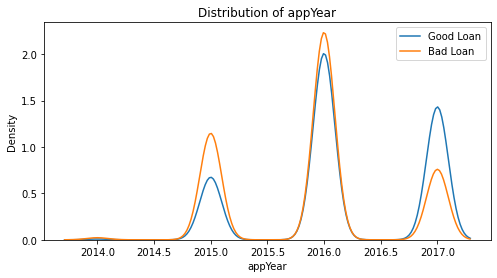

Correlation of appYear and loanQuality : -0.2010002372524787


In [120]:
# visualise the data that are negatively correlated with loanQuality
lQneg = loanQualCorrC[loanQualCorrC < -0.2]

for col in lQneg.index:    
    plt.figure(figsize = (8,4))

    # KDE plot of loans quality
    sns.kdeplot(lpcuvEncode[lpcuvEncode['loanQuality'] == 0][col], label = 'Good Loan')
    sns.kdeplot(lpcuvEncode[lpcuvEncode['loanQuality'] == 1][col], label = 'Bad Loan')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
    correlation = lQneg[col]
    print(f'Correlation of {col} and loanQuality : {correlation}')

We have displayed only features that have a correlations coefficient of more than 0.2 or less than -0.2 w.r.t `loanQuality`. This is because a correlation coefficient between -0.2 nad 0.2 is considered very weak.

Observation from the above graphs:
* `Rejected`, `R01` and `Cancelled` is the three most positively correlated features to `loanQuality`, which is not surprising.
* `Rejected_fpStatus` is weakly positively correlated to `loanQuality` with correlation coeffiencts of 0.37. This indicates that the loan will likely be a bad loan if the first payment status is rejected.
* `bvMandatory` is positively correlated to `loanQuality` with correlation coefficients of 0.21. `bvMandatory` are leads that are bought from the ping tree and required to perform bank verification before loan approval. This is might indicates that application that required bank verification are normally bad quality.
* `Checked_fpStatus` is moderately negatively correlated to `loanQuality`. This indicates that thge loan will likely be good loan if the first payment status is checked.
* `principalPayment` and `feesPayment` are negatively correlated with `loanQuality`, which is not suprising.
* `oriYear`, `appYear` and `fPYear` are negatively correlated with `loanQuality`. From the density plot, we noticed that the proportion of good loans is larger than that of bad loans since 2017, and the porpotion of good loans over the total loans has been increasing over time.  

#### Machine Learning Model Development

We will now develop machine learning models to predict the quality of loan. Since we have quality the loans as either good or bad loan, hence this is a binary classfication problem. 

We will use **Logistic Regression** model as a baseline case as it is a simple model and relatively robust to overfitting.

Then, we will use **Support Vector Machine (SVM)** and **Random Forest** to see if there's any improvement as compared to the baseline.

Reason for using SVM:
* Accurate and tends to not overfit
* Able to handle complex, nonlinear classification very well through kernel method

Reason for using Random Forest:
* Robust to outliers and noise
* Able to handle large datasets with large number of features

In [97]:
X = lpcuvEncode.drop('loanQuality', axis=1)
y = lpcuvEncode['loanQuality']

In [170]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state=42)

# standardize
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#### Logistic Regression

In [234]:
warnings.simplefilter("ignore")

# fit Logistic Regression
lr = LogisticRegression(C = 0.001)
lr.fit(X_train, y_train)

print(f'Accuracy score for predicting y_test: {lr.score(X_test, y_test)}')
print(f'Accuracy score for predicting y: {lr.score(X, y)}')

Accuracy score for predicting y_test: 0.9273261919764755
Accuracy score for predicting y: 0.6475607834899963


#### Support Vector Machine (SVM)

Before training the model, we will implement grid search to identify the hyperparameter value that gives the most accurate result.

In [117]:
svc_gs = GridSearchCV(estimator = SVC(),
                      param_grid = {'kernel': ('linear', 'poly', 'rbf')})
svc_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ('linear', 'poly', 'rbf')})

In [129]:
print("The best kernel:",svc_gs.best_params_)
print("The best score from the kernel:",svc_gs.best_score_)

The best kernel: {'kernel': 'linear'}
The best score from the kernel: 0.9449307589305633


In [233]:
warnings.simplefilter("ignore")

# fit svm
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

print(f'Accuracy score for predicting y_test: {svm.score(X_test, y_test)}')
print(f'Accuracy score for predicting y: {svm.score(X, y)}')

Accuracy score for predicting y_test: 0.947069943289225
Accuracy score for predicting y: 0.8629417633776191


#### Random Forest

Same as the case for SVM, we will implement grid search to identify the hyperparameter value that gives the most accurate result before training the model.

In [168]:
def plot_accuracy(hyperparameter, accuracy_dict):
    for label, accuracy in accuracy_dict.items():
        plt.plot(hyperparameter, accuracy, label=label)

    # add labels for x and y axis
    plt.xlabel(f'${hyperparameter}$')
    plt.ylabel('classification accuracy')
    plt.legend()
    
    plt.show()

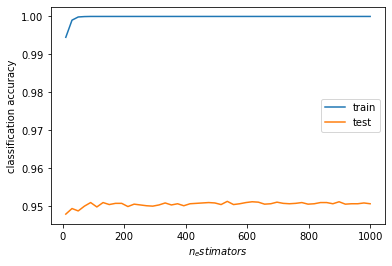

In [166]:
n_estimators = np.linspace(10, 1000, 50)

accuracy_train, accuracy_test = [], []
for n in n_estimators:
    rfc = RandomForestClassifier(random_state = 42, n_estimators = int(n))
    rfc.fit(X_train, y_train)
    
    predict_train = rfc.predict(X_train) #train
    predict_test = rfc.predict(X_test) #test
        
    accuracy_train.append(accuracy_score(y_train, predict_train))
    accuracy_test.append(accuracy_score(y_test, predict_test))

# plot train and test accuracy
plot_accuracy(n_estimators, {'train': accuracy_train, 'test': accuracy_test})

From above graph, larger value of `n_estimators` leads to higher accuracy but it doesn't improve a lot. We will choose `n_estimators` = 500

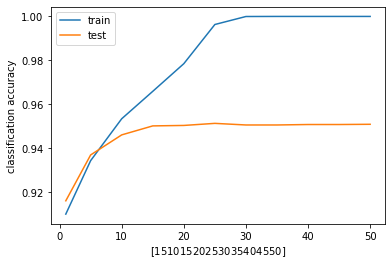

In [171]:
max_depth = np.linspace(1,50,11).astype(int)

accuracy_train, accuracy_test = [], []
for n in max_depth:
    rfc = RandomForestClassifier(random_state = 42,
                                 n_estimators = 500,
                                 max_depth = int(n))
    rfc.fit(X_train, y_train)
    
    predict_train = rfc.predict(X_train) #train
    predict_test = rfc.predict(X_test) #test
        
    accuracy_train.append(accuracy_score(y_train, predict_train))
    accuracy_test.append(accuracy_score(y_test, predict_test))

# plot train and test accuracy
plot_accuracy(max_depth, {'train': accuracy_train, 'test': accuracy_test})

The model achieve the relatively high accuracy score when `max_depth` is larger than 20.

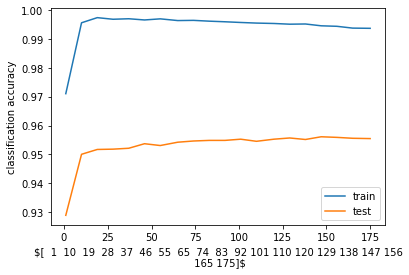

In [177]:
max_features = np.linspace(1,X.shape[1], num=20).astype(int)

accuracy_train, accuracy_test = [], []
for n in max_features:
    rfc = RandomForestClassifier(random_state = 42,
                                 n_estimators = 500,
                                 max_depth = 25,
                                 max_features = n)
    rfc.fit(X_train, y_train)
    
    predict_train = rfc.predict(X_train) #train
    predict_test = rfc.predict(X_test) #test
        
    accuracy_train.append(accuracy_score(y_train, predict_train))
    accuracy_test.append(accuracy_score(y_test, predict_test))

# plot train and test accuracy
plot_accuracy(max_features, {'train': accuracy_train, 'test': accuracy_test})

The model achieve relatively high accuracy once `max_features` exceed 50 for the test data. Hence we will set our `max_features` as 100.

In [231]:
warnings.simplefilter("ignore")

rfc = RandomForestClassifier(random_state = 42,
                             n_estimators = 500,
                             max_depth =25,
                             max_features = 100,
                             bootstrap = True)
rfc_gs = GridSearchCV(estimator = rfc,
                      param_grid = {'criterion' : ['gini', 'entropy', 'log_loss']})

rfc_gs.fit(X_train,y_train)

print("The best kernel:",rfc_gs.best_params_)
print("The best score from the kernel:",rfc_gs.best_score_)

The best kernel: {'criterion': 'entropy'}
The best score from the kernel: 0.9543132315065007


#### Summary of hyperparameter for Random Forest

From the above, we obtain the following hyperparameter value:
* `n_estimators` : 500
* `max_depth` : 25
* `max_features` : 100
* `criterion` : entropy

In [183]:
warnings.simplefilter("ignore")

# fit Random Forest
rfc = RandomForestClassifier(random_state = 42,
                             n_estimators = 500,
                             max_depth =25,
                             max_features = 100,
                             criterion = 'entropy',
                             bootstrap = True)
rfc.fit(X_train, y_train)

print(f'Accuracy score for predicting y_test: {rfc.score(X_test, y_test)}')
print(f'Accuracy score for predicting y: {rfc.score(X, y)}')

Accuracy score for predicting y_test: 0.955681579500105
Accuracy score for predicting y: 0.916084650527753


In [188]:
warnings.simplefilter("ignore")

y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

print(f'Logistic Regression -> Accuracy score : {accuracy_score(y_test, y_pred_lr)}')
print(f'Support Vector Machine -> Accuracy score : {accuracy_score(y_test, y_pred_svm)}')
print(f'Random Forest -> Accuracy score : {accuracy_score(y_test, y_pred_rfc)}')

Logistic Regression -> Accuracy score : 0.9273261919764755
Support Vector Machine -> Accuracy score : 0.947069943289225
Random Forest -> Accuracy score : 0.955681579500105


Random Forest produces the highest accuracy score. Hence, we will choose Random Forest for our classification model.

#### Feature Importance & Principal Component Analysis (PCA)

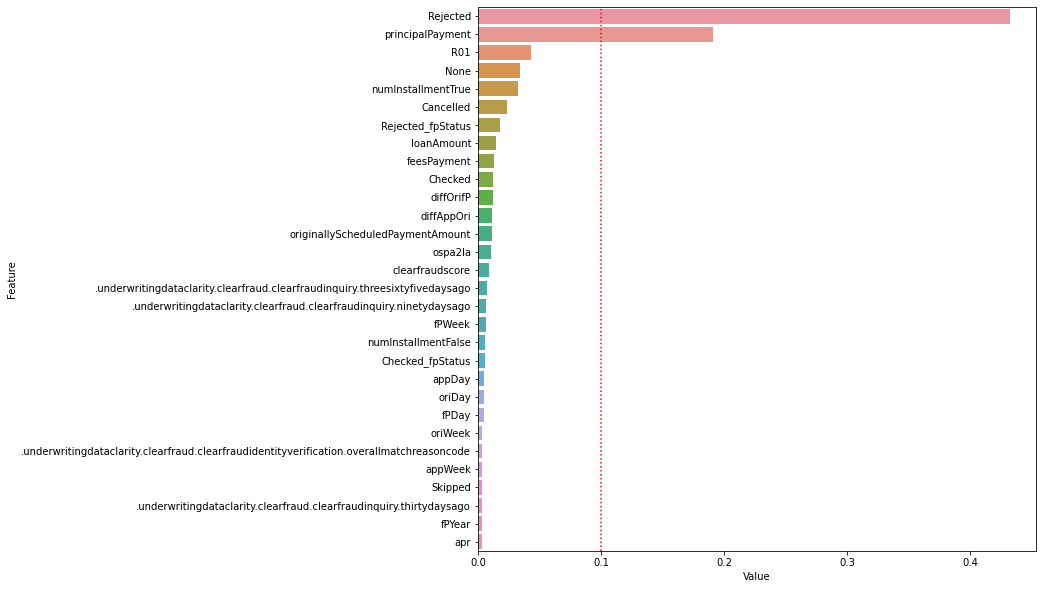

In [209]:
# features importance for random forest
rfc_fi = pd.DataFrame(sorted(zip(rfc.feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 10))
barplot = sns.barplot(x="Value", y="Feature", data=rfc_fi.sort_values(by="Value", ascending=False).head(30))
barplot.axvline(x=0.1, color='red', linestyle =':')
plt.show()

`Rejected` and `principalPayment` are relatively importance features as compared to other features.

We implement Principal Component Analysis (PCA) to identify if there's a number of principal components which yields the best cumulative explained variance.

Text(0, 0.5, 'Variance Explained')

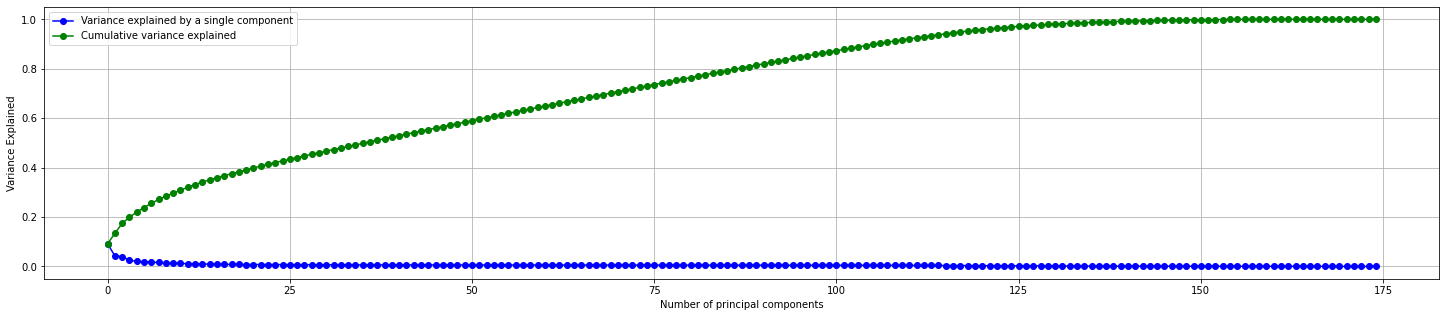

In [232]:
pca = PCA(n_components = X.shape[1])
pca.fit(X_train)

fig=plt.figure(figsize=(25,5))
plt.grid()
plt.plot(pca.explained_variance_ratio_, marker='o', color='b')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='g')
plt.legend(["Variance explained by a single component", "Cumulative variance explained"])
plt.xlabel('Number of principal components')
plt.ylabel('Variance Explained')

We conclude that there is no small number of features that dominate the outcome of the classification.

#### Conclusion

The Random Forest model produced the highest accuracy of 0.96 on the test data. Although this is considered a high accuracy score, it is important to conduct hyperparameter tuning periodically to ensure that the hyperparameters values are not outdated. Besides, due to computing power limitations, cross validation was not carried out. However, it is important to test the robustness of the model to avoid overfitting. More advanced machine learning or AI models, such as Deep Neural Network and Reinforcement Learning, can be implemented to see if better result can be achieved.

However, we will discuss more about the dataset collected from the borrowers as bad data quality will lead to bad output i.e. Garbage In Garbage Out.

Firstly, we note that the data from the `payment` table was collected after the loan was originated, and the data from the `clarity_underwriting_variables` table are provided by a third party data provider. In my opinion, while the information from these 2 tables is insightful, it may not be as useful as we thought. As a lender, we would want to be able to identify the quality of loan before we approve it. not after it is originated. Therefore, the `payment` table would be of no use in the loan approval process. On the other hand, since not all applicants have a `clarityFraudId`, this may mislead the classification result, where applicants who are supposed to be good quality are being classified as bad quality due to no `clarityFraudId`. Nonetheless, we acknowledge the fact that the `payment` table is very useful in portfolio and risk management while the `clarityFraudId` table provides another level of scrutiny on the applicants.

To improve our data quality, we can request for more information from applicants during the loan application process, subject to regulations. Below are a few suggestions on the information that can be requested from the applicants:
* Income statement
* Employment
* Tax code
* Purpose of loan
* Debt amount during loan application
* Age
* Does the applicant has any dependants